In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import entropy
import statsmodels.api as smapi
from matplotlib.patches import Rectangle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/gyandevgupta/DS203_Assignment/master/masterA5.csv"

Q.1 For the data source at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016, 
perform the following steps in python using pandas, matplotlib and/or seaborn. Use code cells to 
perform functions with a comment for each line explaining what it is doing (and using intuitive variable 
names), and mark-down cells to note down any significant observations after each code cell (e.g., 
“Variable X appears to be normal distributed”):

In [3]:
#i. Read the data file into a data frame.
df = pd.read_csv(url)
#ii. Display a portion of the data to get a feel for the dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Boomers


In [5]:
df.sample(n=10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
5601,Chile,2013,male,55-74 years,288,1296922,22.21,Chile2013,0.830,"2,78,38,43,32,694",17140,Boomers
6153,Costa Rica,1997,male,75+ years,5,30984,16.14,Costa Rica1997,NaN,"12,55,20,71,367",3827,G.I. Generation
19161,Poland,1999,female,15-24 years,84,3186200,2.64,Poland1999,NaN,"1,69,71,76,77,901",4640,Generation X
25923,Turkmenistan,2003,female,5-14 years,2,547801,0.37,Turkmenistan2003,NaN,"5,97,75,60,877",1431,Millenials
5252,Canada,2013,male,35-54 years,1244,5032714,24.72,Canada2013,0.912,"18,42,62,80,05,830",55310,Generation X
18758,Paraguay,2004,male,55-74 years,20,226553,8.83,Paraguay2004,NaN,"8,03,38,77,360",1598,Silent
5169,Canada,2006,male,75+ years,188,806380,23.31,Canada2006,NaN,"13,15,41,51,97,461",42566,Silent
21836,Saint Vincent and Grenadines,2008,male,55-74 years,1,5420,18.45,Saint Vincent and Grenadines2008,NaN,"69,54,28,852",6966,Silent
14537,Kyrgyzstan,1994,female,25-34 years,10,338900,2.95,Kyrgyzstan1994,NaN,"1,68,10,06,993",437,Boomers
26765,United Kingdom,2009,male,25-34 years,564,4047103,13.94,United Kingdom2009,NaN,"23,82,82,59,85,356",41074,Generation X


In [6]:
#iii. Print the number of records.
#iv. Print the number of variables.
#v. Print the datatype of each variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
#vi. For each variable, print the number of unique values.
df.nunique(dropna = True)

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

vii. Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not 
nominal or ordinal), and continuous variables. \\

Country: Nominal \\
Year: Temporal \\
Sex: Nominal \\
Age: Ordinal \\
Suicides_no:Integer \\
Population: Integer \\
suicides/100k pop: Continuous \\
country-year: Continuos \\
HDI for year: Continuous \\
gdp_for_year (\$): Continuos \\
gdp_per_capita (\$): Continuous \\
generation: Ordinal \\



In [8]:
#viii. For each variable, display the number of missing entries
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

###This below column have no missing or null entries
country                   
year                      
sex                       
age                       
suicides_no               
population                
suicides/100k pop         
country-year                       
gdp_for_year (\$)         
gdp_per_capita (\$)        
generation    \\

###In total there are 27820-19456 = 8364 valid row records
### Overall HDI column itself have 69.9 % missing data or NaN so it would be a good idea to remove that column and then do the analysis and we can also remove the COUNTRY-YEAR column can also be removed since we already have both data individually 

In [9]:
df=df.drop(columns=["country-year","HDI for year"])
df[" gdp_for_year ($) "] = df[" gdp_for_year ($) "].str.replace(',','').astype(float)
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)     float64
gdp_per_capita ($)      int64
generation             object
dtype: object

#ii. Discrete Variables:

In [10]:
discrete_var = ["country","year","sex","age","generation"]

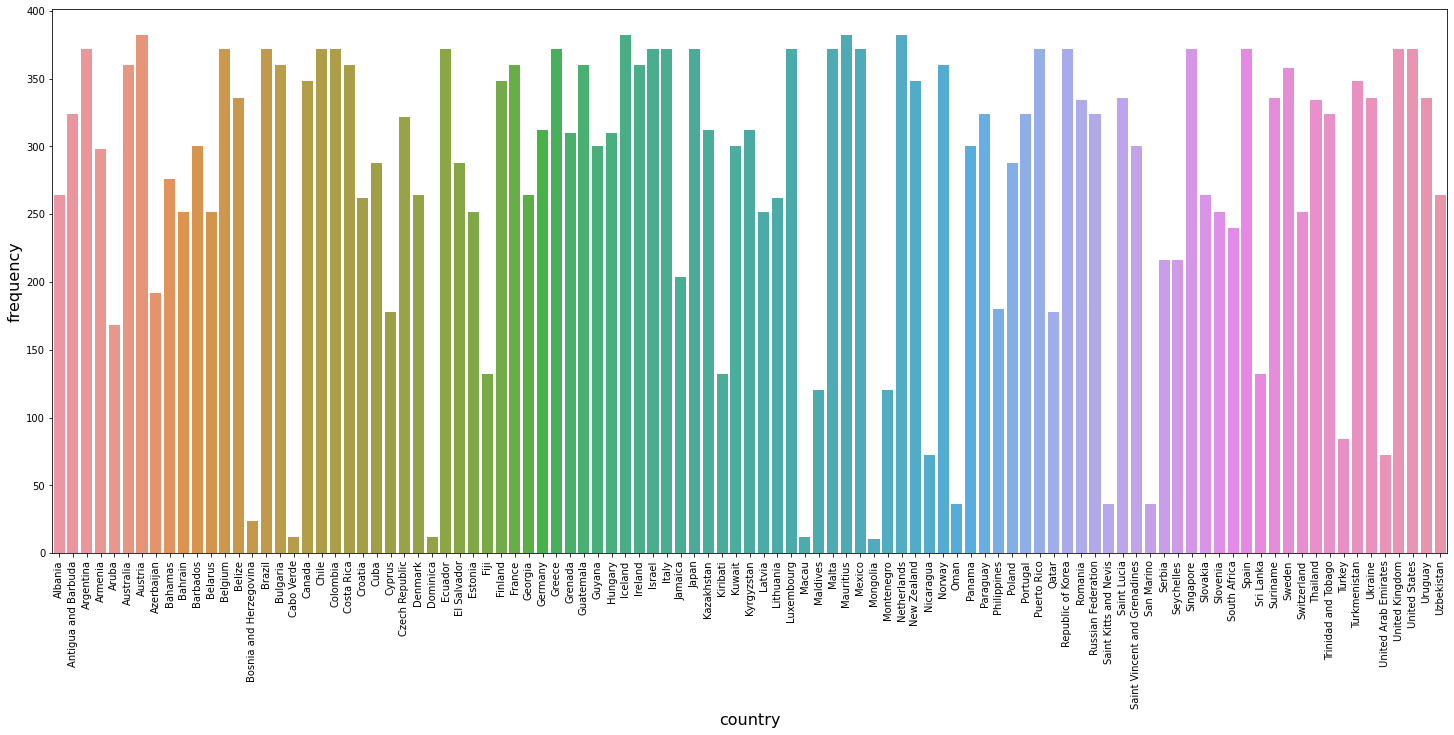

The order of mode value of the country frequency plot is:
0        Austria
1        Iceland
2      Mauritius
3    Netherlands
dtype: object

The entropy value for the country plot is :
6.509606001511676



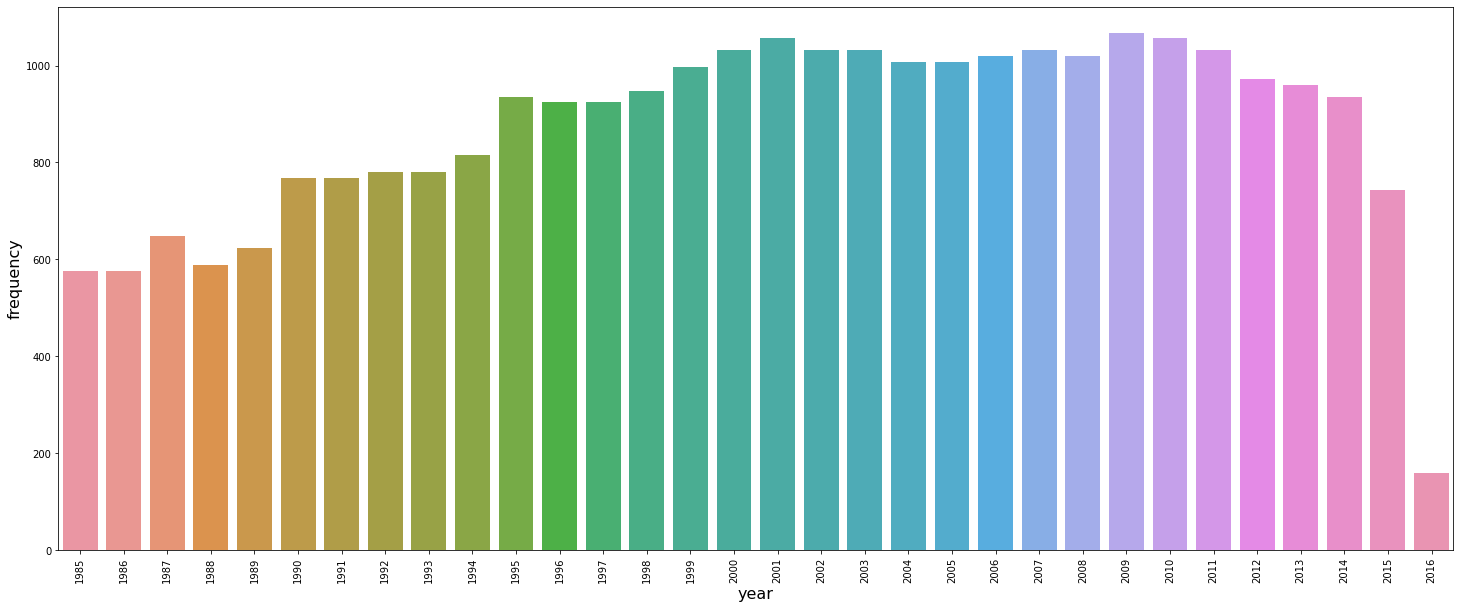

The order of mode value of the year frequency plot is:
0    2009
dtype: int64

The entropy value for the year plot is :
4.952708775332643



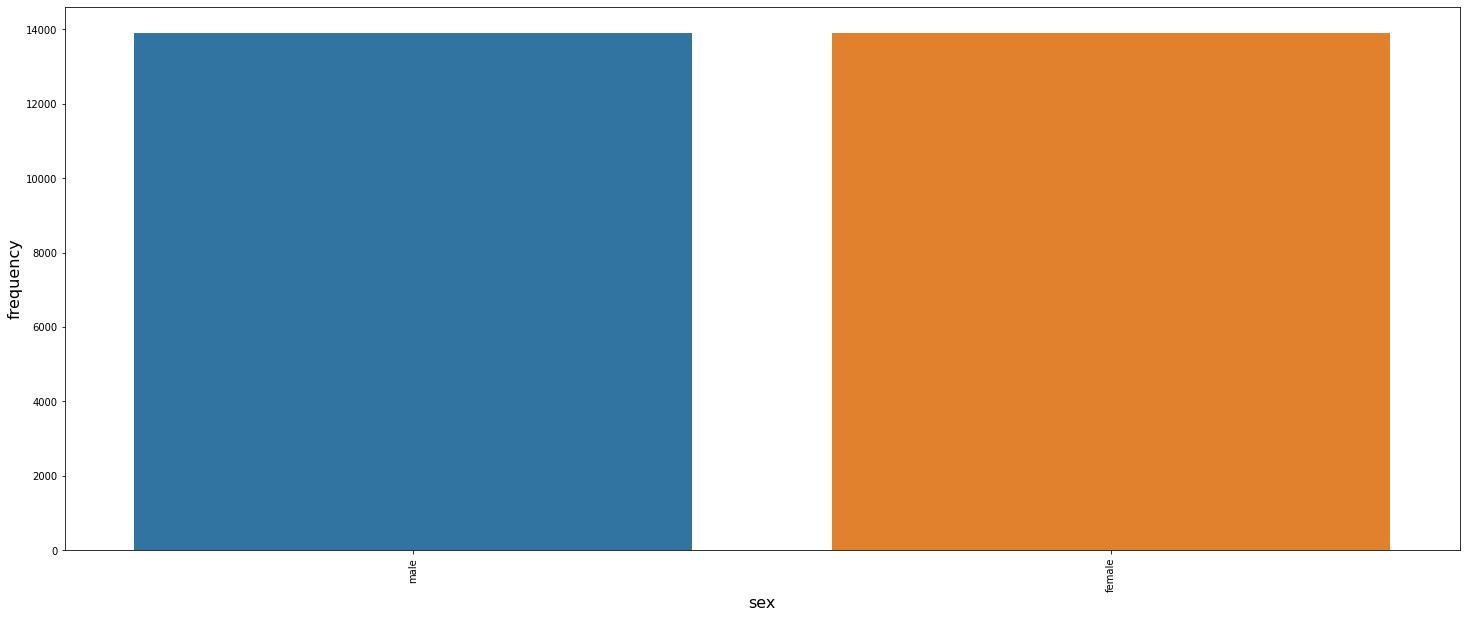

The order of mode value of the sex frequency plot is:
0    female
1      male
dtype: object

The entropy value for the sex plot is :
1.0



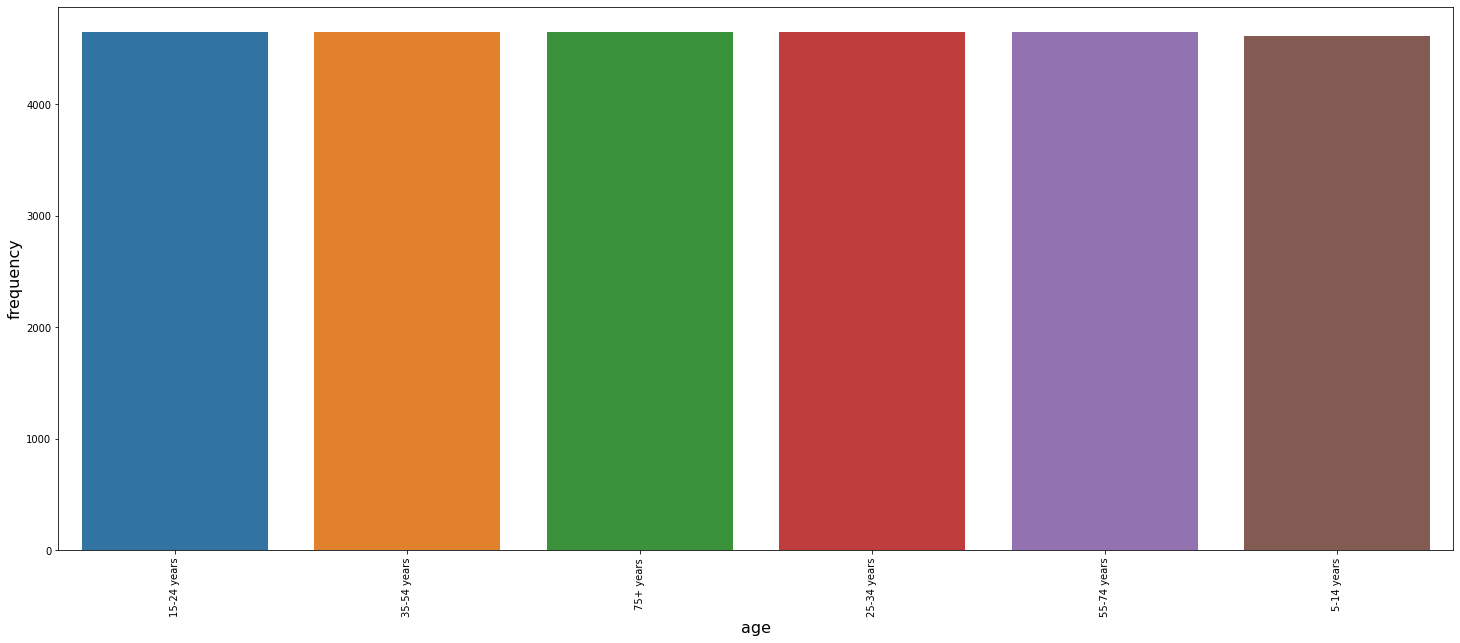

The order of mode value of the age frequency plot is:
0    15-24 years
1    25-34 years
2    35-54 years
3    55-74 years
4      75+ years
dtype: object

The entropy value for the age plot is :
2.584957721382318



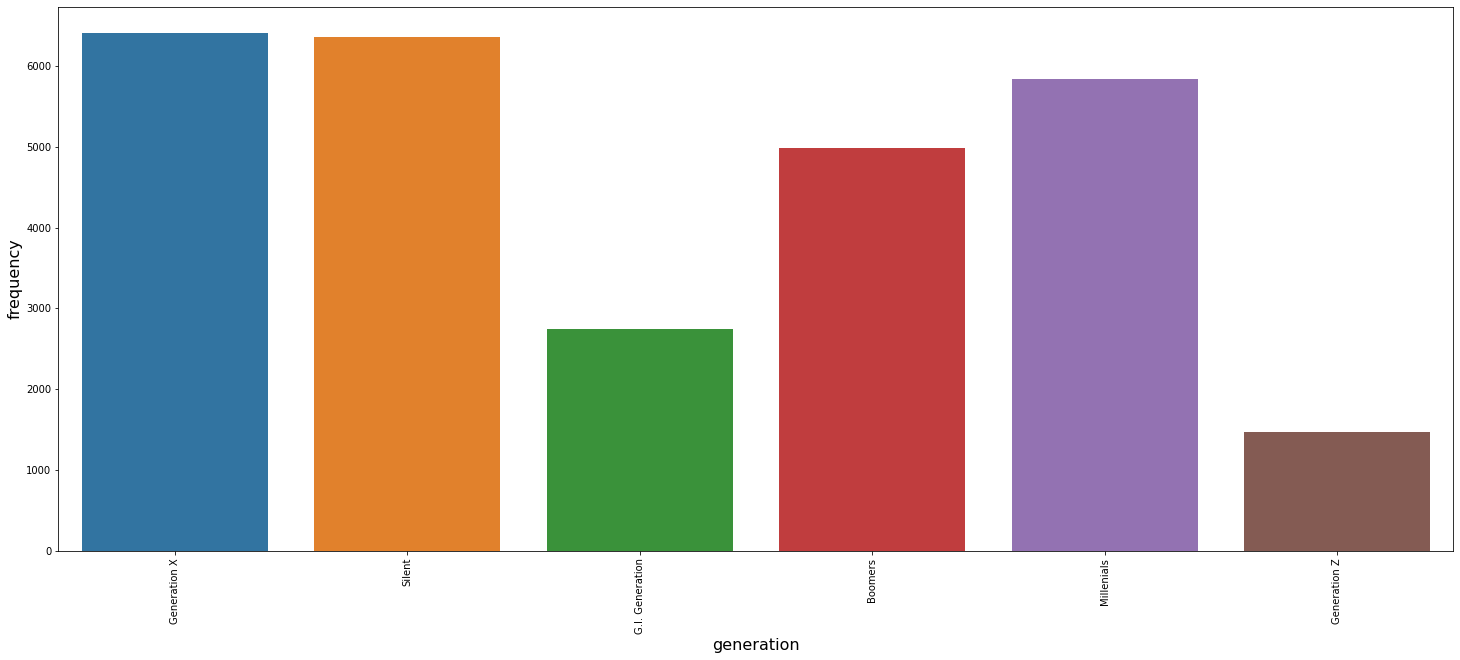

The order of mode value of the generation frequency plot is:
0    Generation X
dtype: object

The entropy value for the generation plot is :
2.4460161350809893



In [11]:
for col in discrete_var:
  # plt.hist(y=df["country"], x=df[col])
  # plt.title("Histogram of {}".format(col))
  plt.figure(figsize=(25,10))
  plt.xticks(rotation=90)
  sns.countplot(x=df[col])
  plt.ylabel("frequency", fontsize=16)
  plt.xlabel(col,fontsize=16)
  plt.show()
  print("The order of mode value of the " + col + " frequency plot is:")
  print(df[col].mode())
  print()
  print("The entropy value for the " + col + " plot is :")
  print(str(entropy(df[col].value_counts(), base=2)))
  print()

#iii. Continuous Variable

In [12]:
continuous_var=["suicides_no","population","suicides/100k pop"," gdp_for_year ($) ","gdp_per_capita ($)"]

In [13]:
for col in continuous_var:
  print("variance: " +str(df[col].var()))
  print("skew: "+str(df[col].skew()))
  print("median: "+str(df[col].median()))
  print("inter-quartile range: " + str(df[col].quantile(0.75) - df[col].quantile(0.25)))
  print(df[col].describe())
  print()

variance: 813690.4442639275
skew: 10.352910335856805
median: 25.0
inter-quartile range: 128.0
count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

variance: 15302018400947.766
skew: 4.459414421535874
median: 430150.0
inter-quartile range: 1388644.75
count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: population, dtype: float64

variance: 359.53889995312005
skew: 2.963414476605633
median: 5.99
inter-quartile range: 15.700000000000001
count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicides/100k pop, dtype: float64

variance: 2.1129819912271505e+24
skew: 7.233755024143678
m

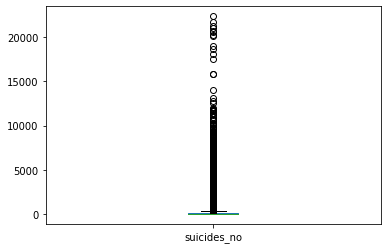

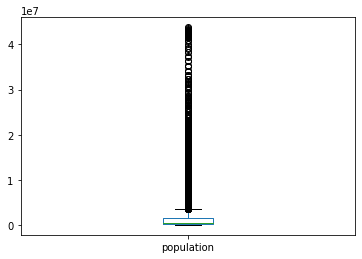

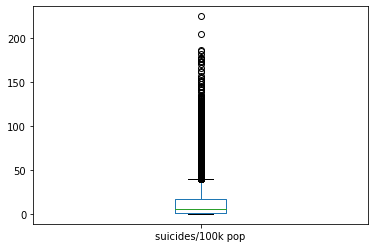

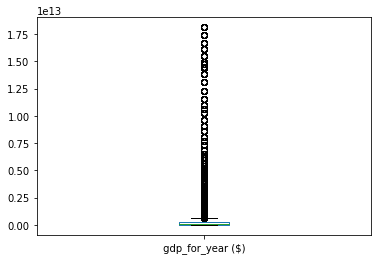

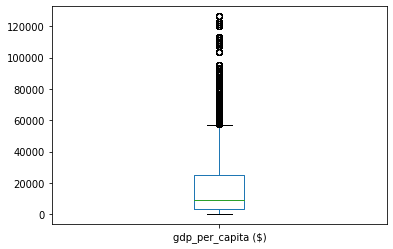

In [14]:
for col in continuous_var:
  df[col].plot.box()
  plt.show()
  print()

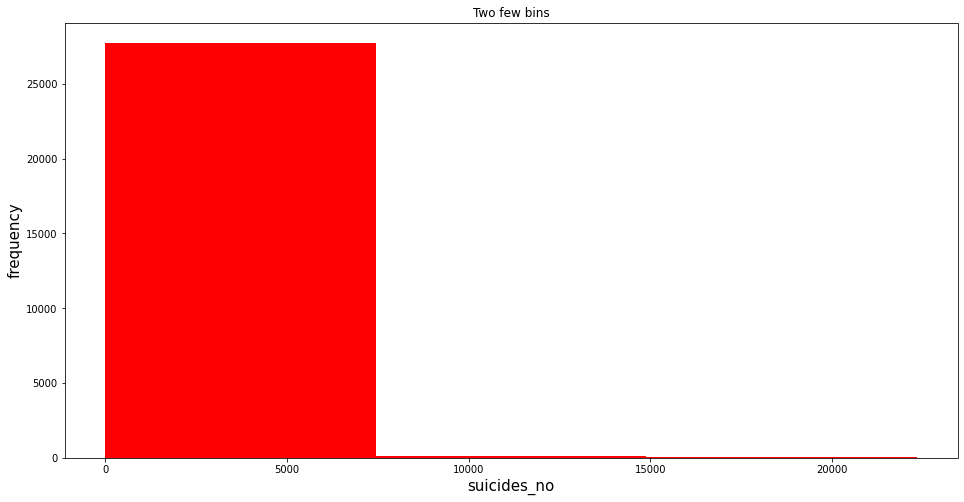

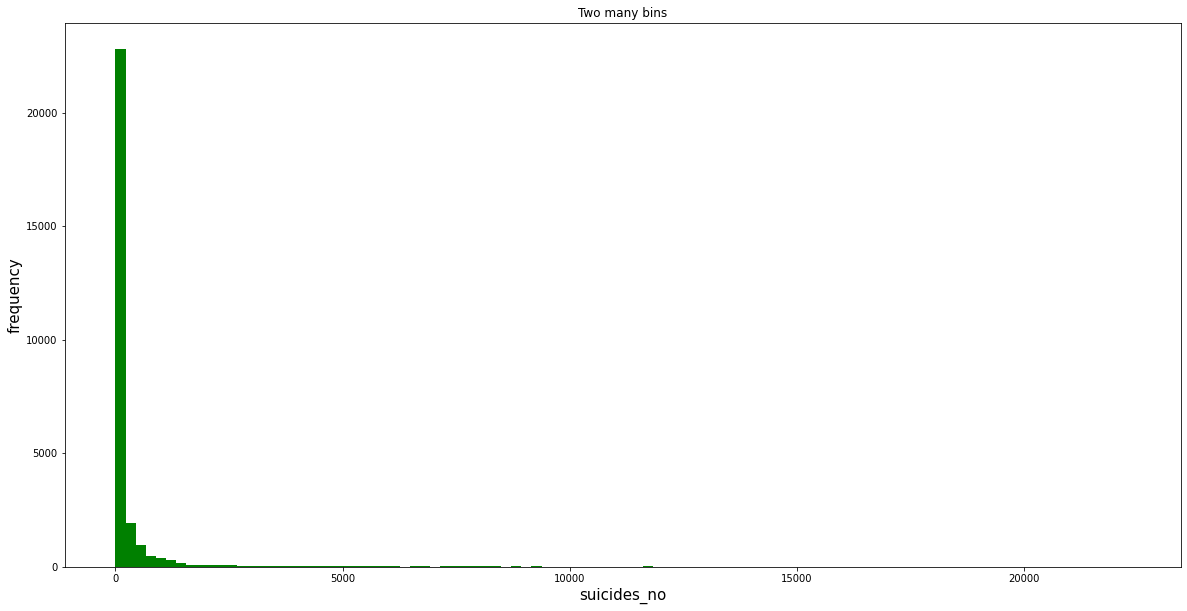

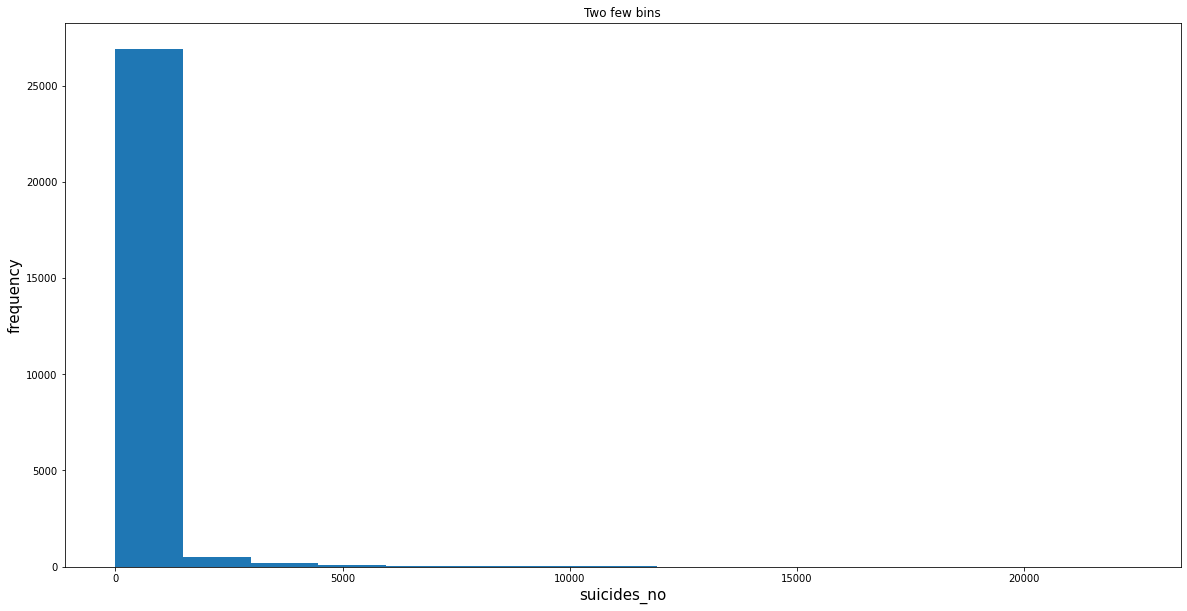

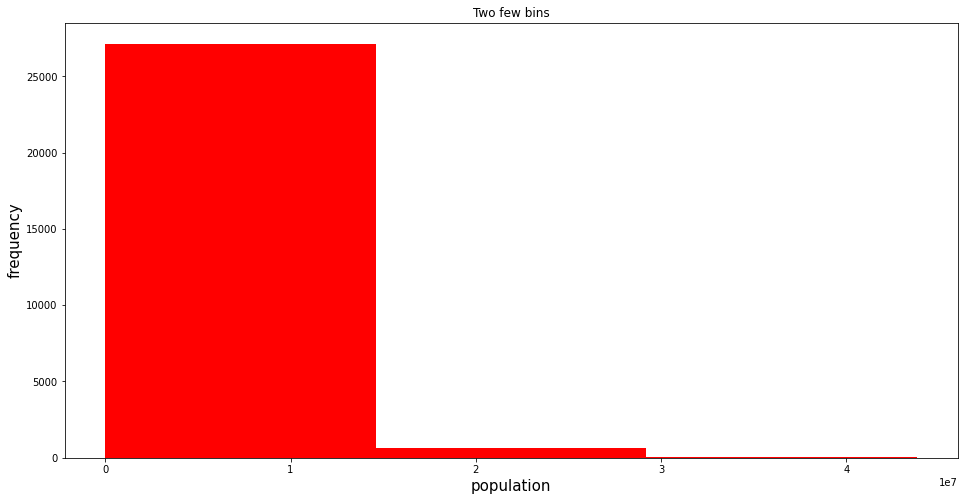

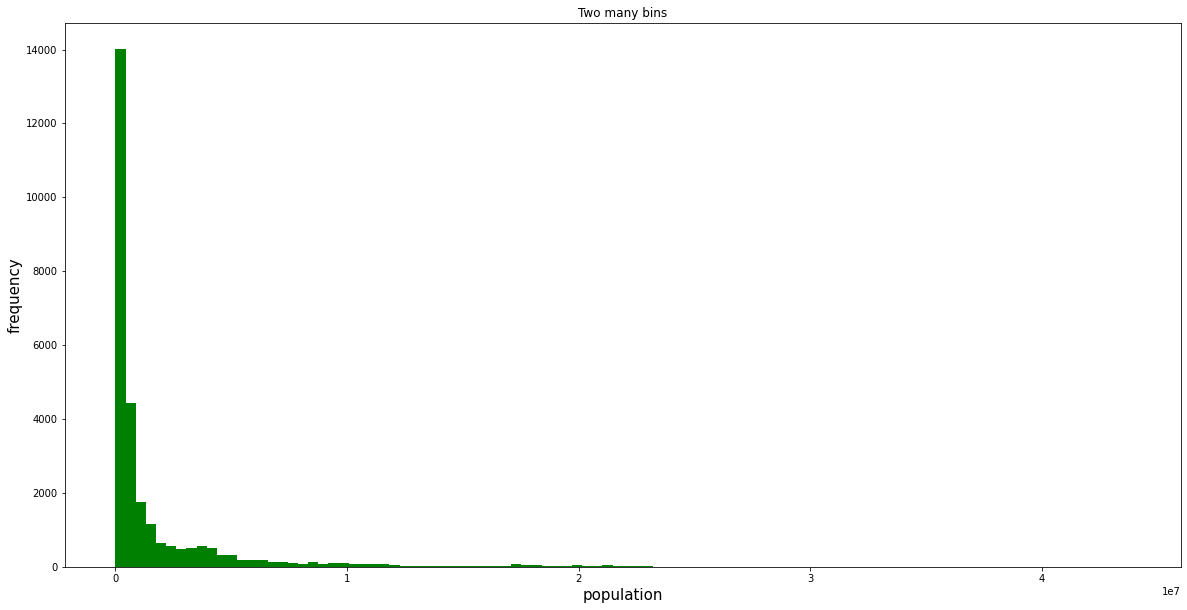

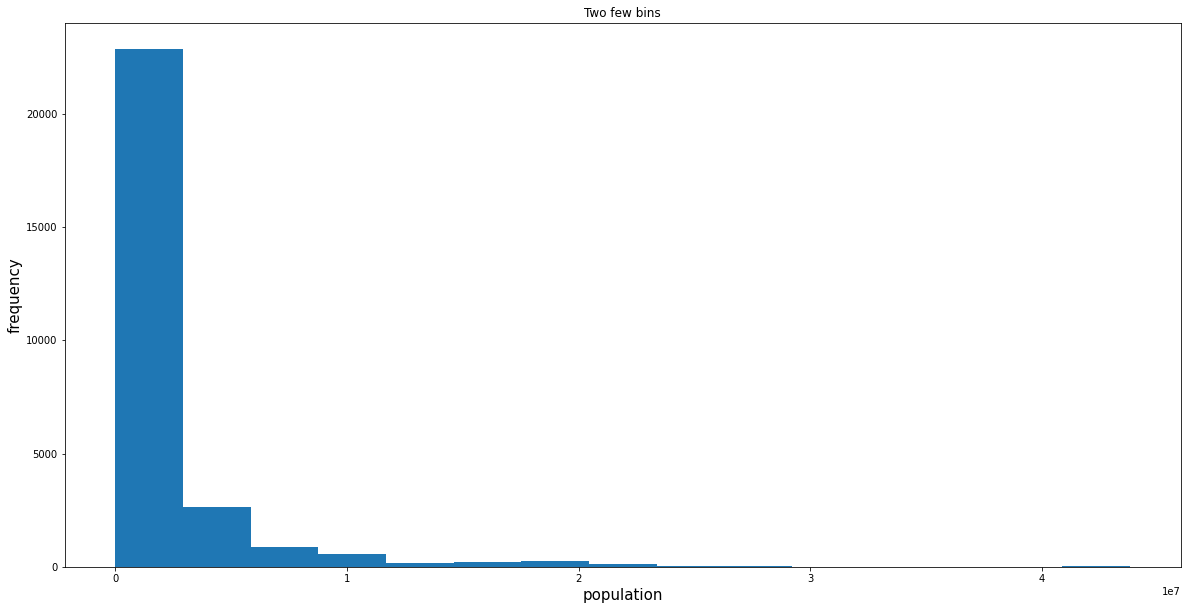

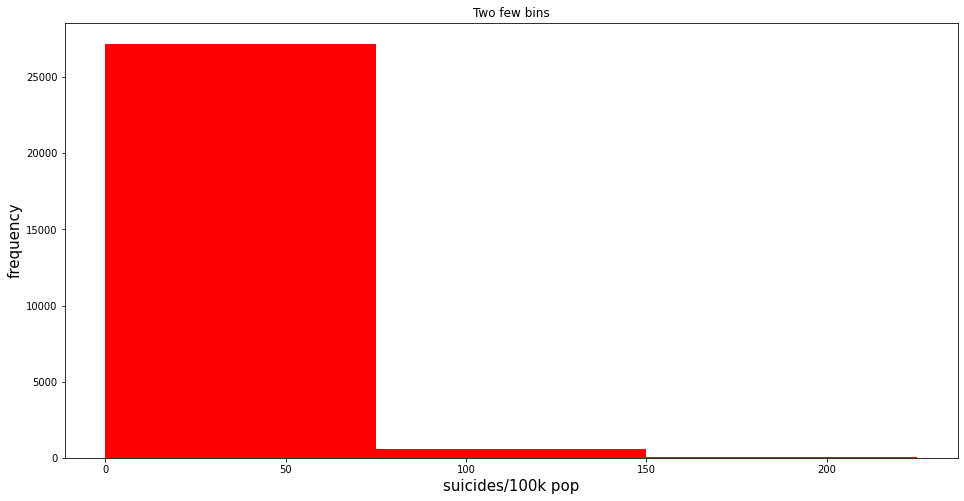

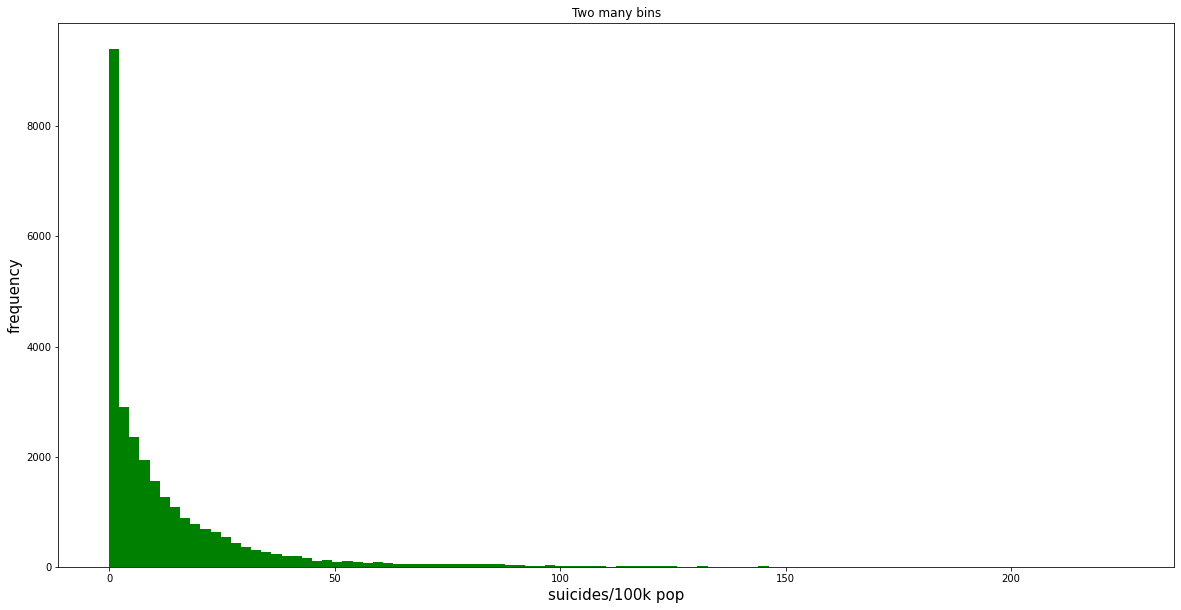

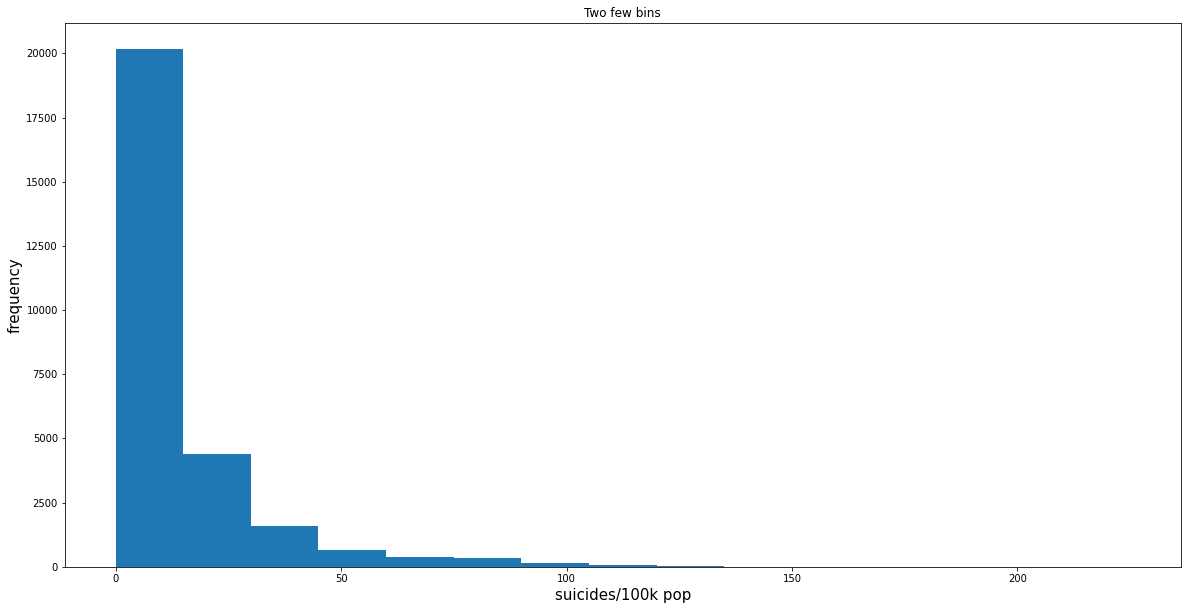

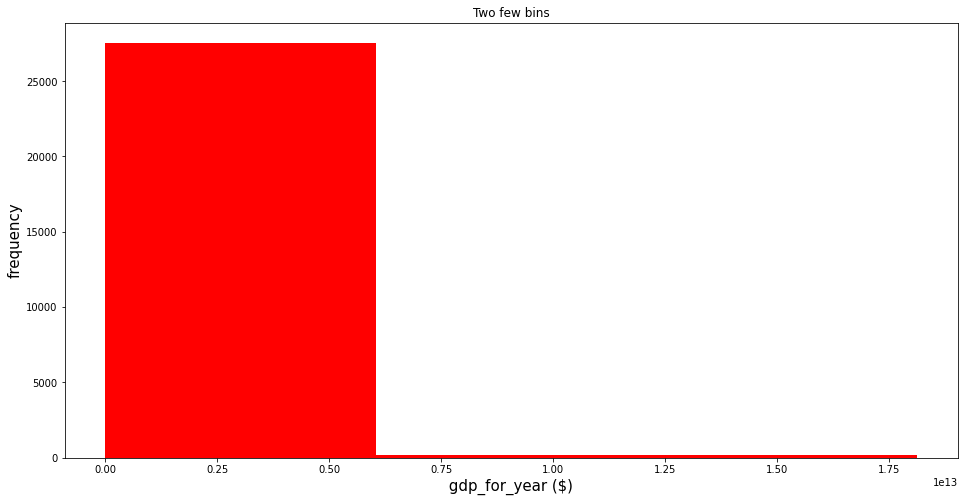

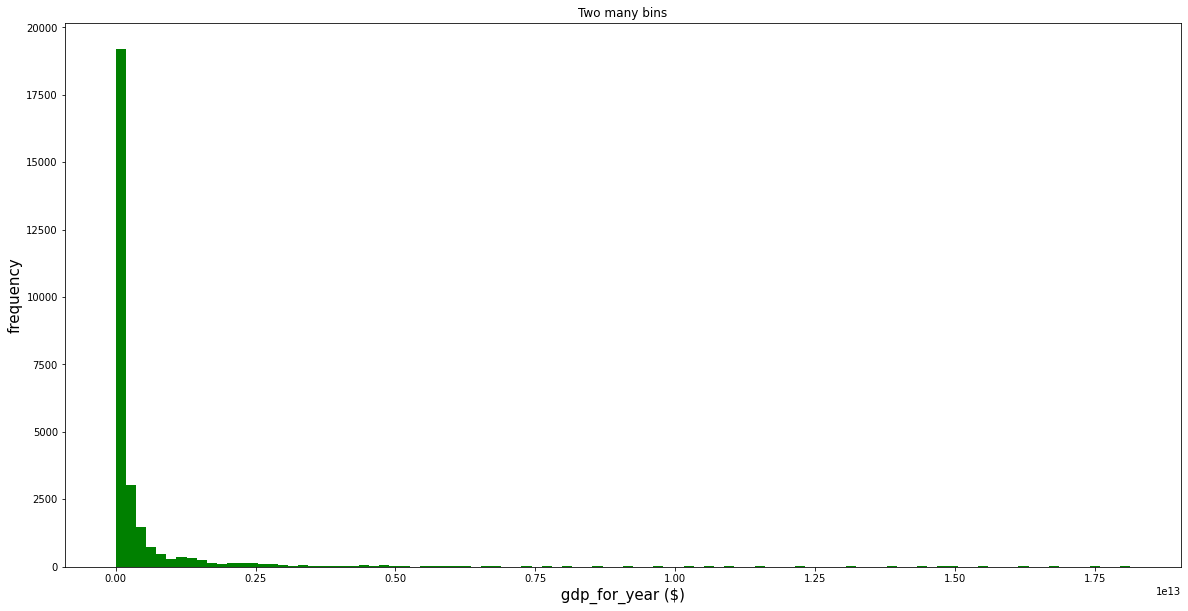

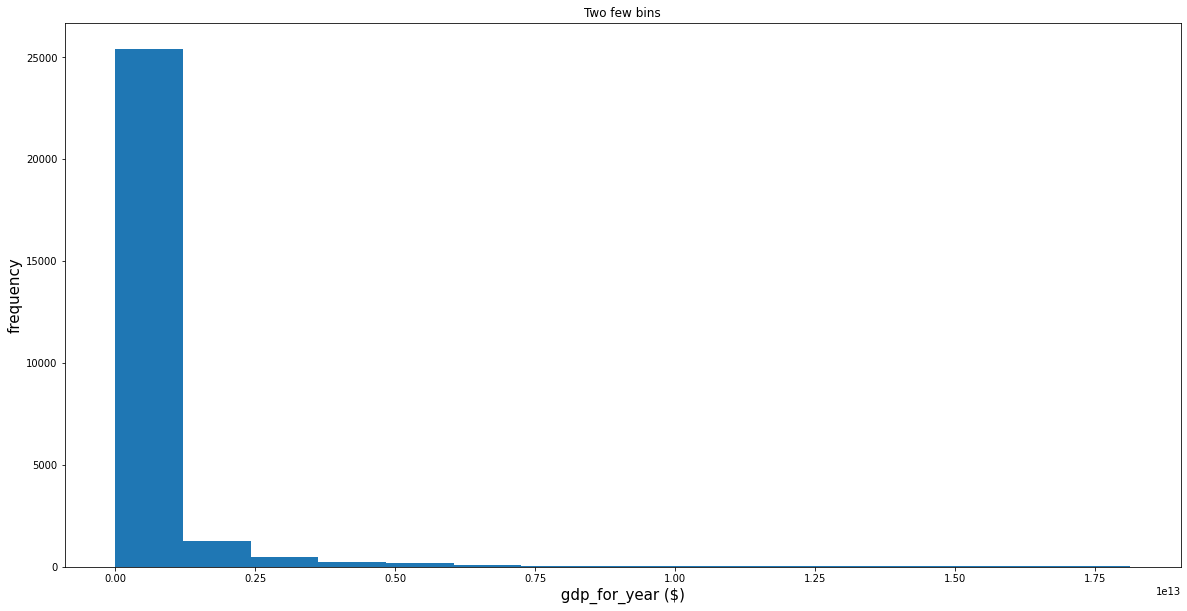

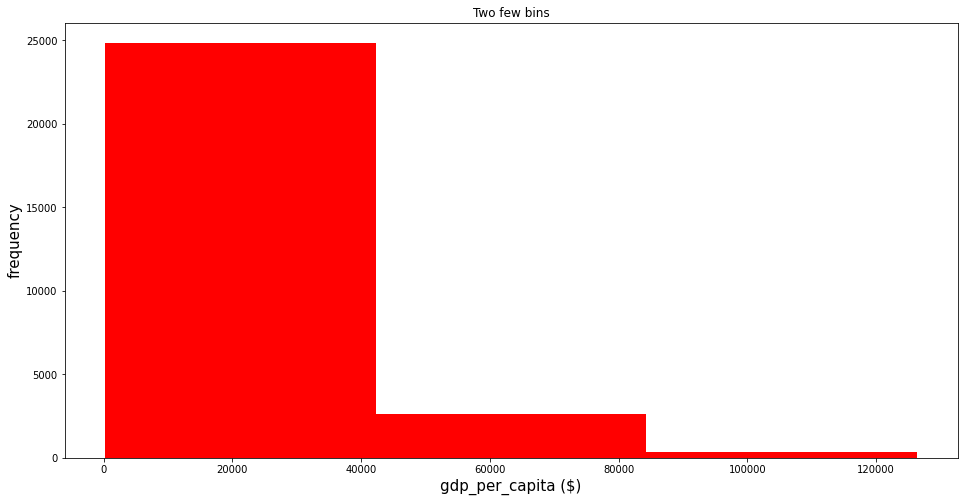

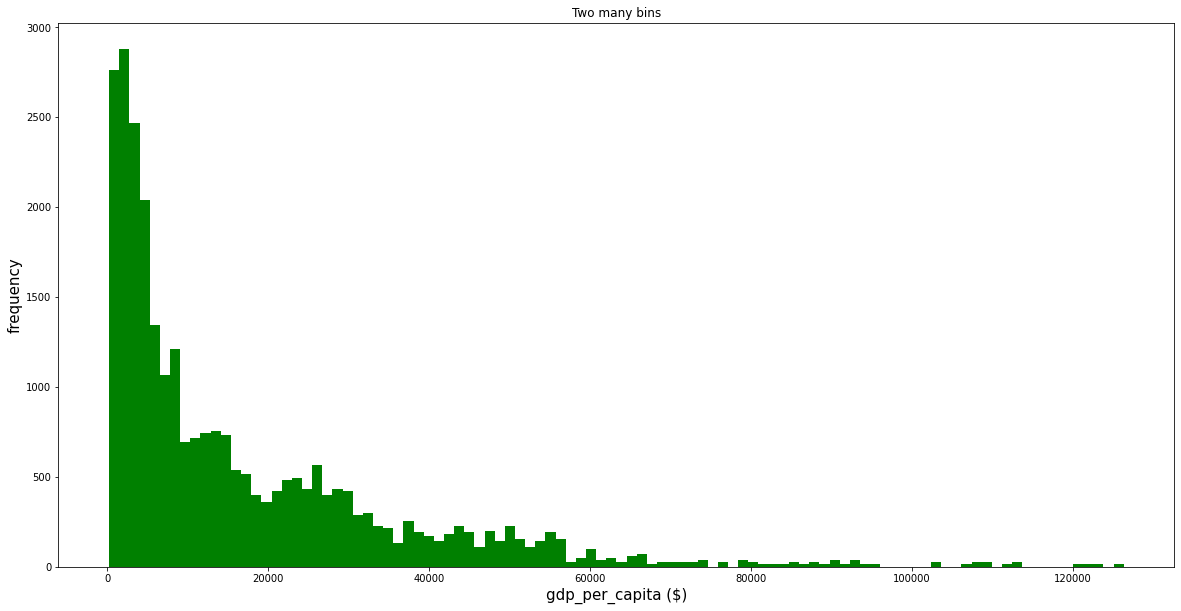

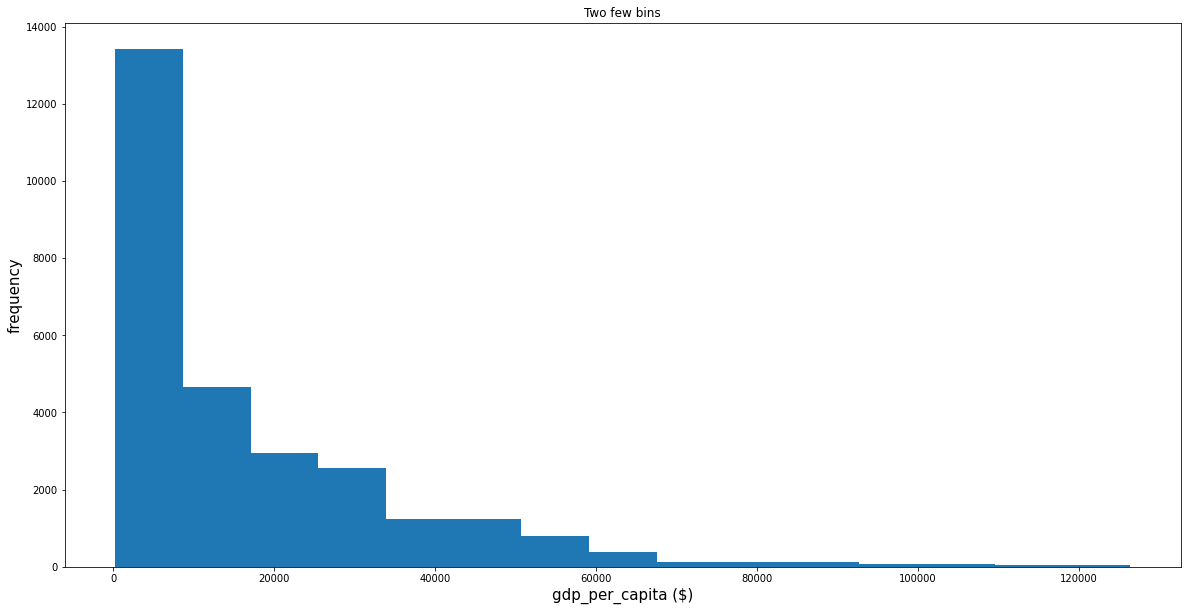

In [15]:
for col in continuous_var:
  plt.figure(figsize=(16,8))
  plt.hist(df[col], bins=3, color="red")
  plt.ylabel("frequency", fontsize=15)
  plt.xlabel(col,fontsize=15)
  plt.title("Two few bins")
  plt.show()
  print()
  plt.figure(figsize=(20,10))
  plt.hist(df[col], bins=100, color="green")
  plt.ylabel("frequency", fontsize=15)
  plt.xlabel(col,fontsize=15)
  plt.title("Two many bins")
  plt.show()
  print()
  plt.figure(figsize=(20,10))
  plt.hist(df[col], bins=15)
  plt.ylabel("frequency", fontsize=15)
  plt.xlabel(col,fontsize=15)
  plt.title("Two few bins")
  plt.show()
  print()

### QQplot

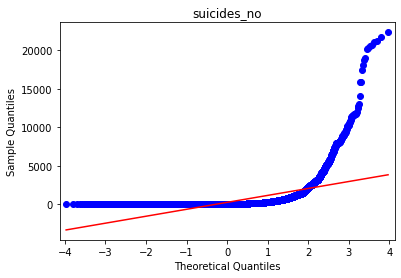

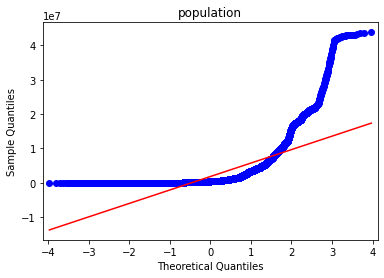

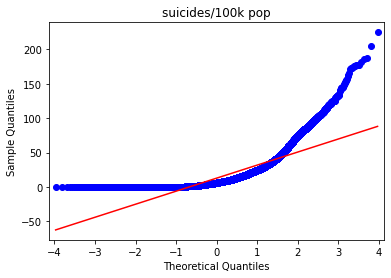

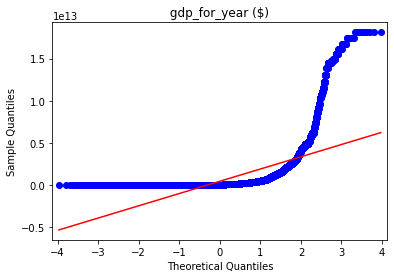

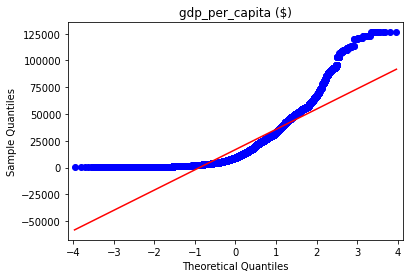

In [34]:
for col in continuous_var:
  fig = smapi.qqplot(df[col], line='s')
  plt.title(col)
  plt.show()

All the plots are right skewed

### QQplot of log

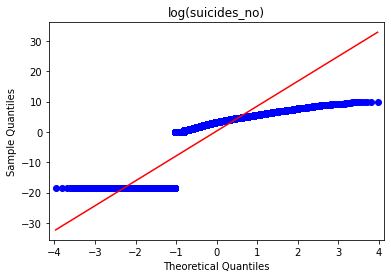

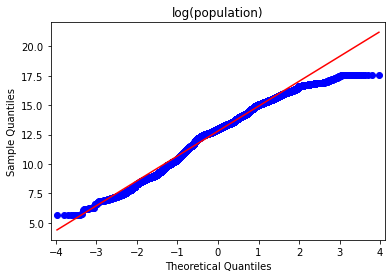

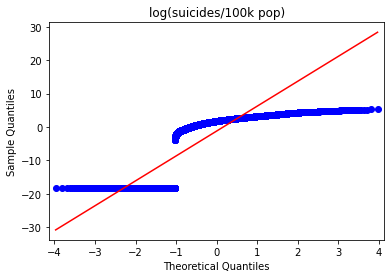

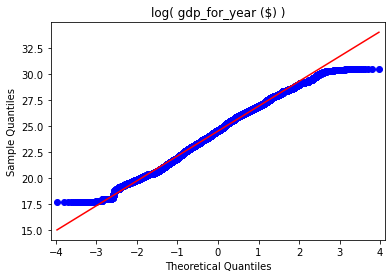

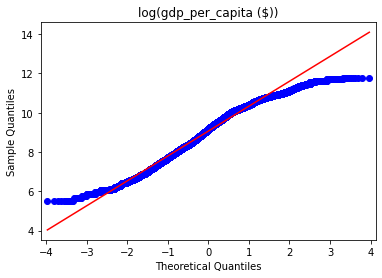

In [17]:
#This is to ensure that it doesnt go towards log 0 otherwise it can give a bad plot
alpha = 0.00000001
for col in continuous_var:
  fig = smapi.qqplot(np.log(df[col]+alpha),line='s')
  plt.title("log(" + col + ")")
  plt.show()

Population, gdp_for_year (\$), gdp_per_capita (\$) are log-normal 
and others not

#iv. Pair-wise interaction

Lets take suicides_no and sex, \\
suicides_no and age

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


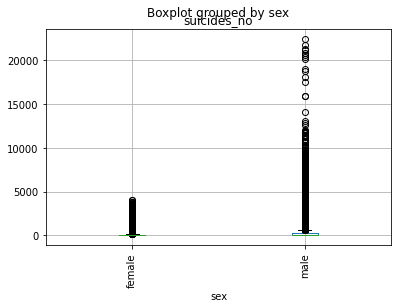

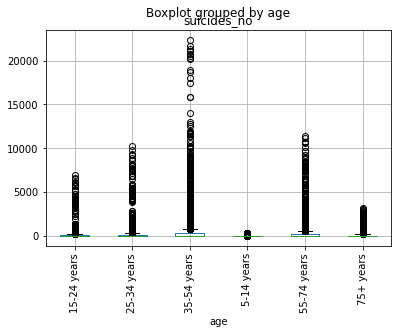

In [18]:
df.boxplot(column="suicides_no",by ="sex", rot=90)
df.boxplot(column="suicides_no",by ="age",rot=90)

##Heatmap

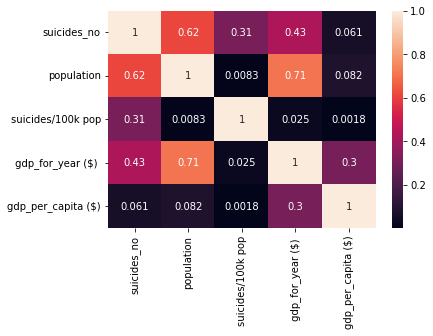

In [19]:
  sns.heatmap(df[continuous_var].corr(),annot=True)

##Creative Part

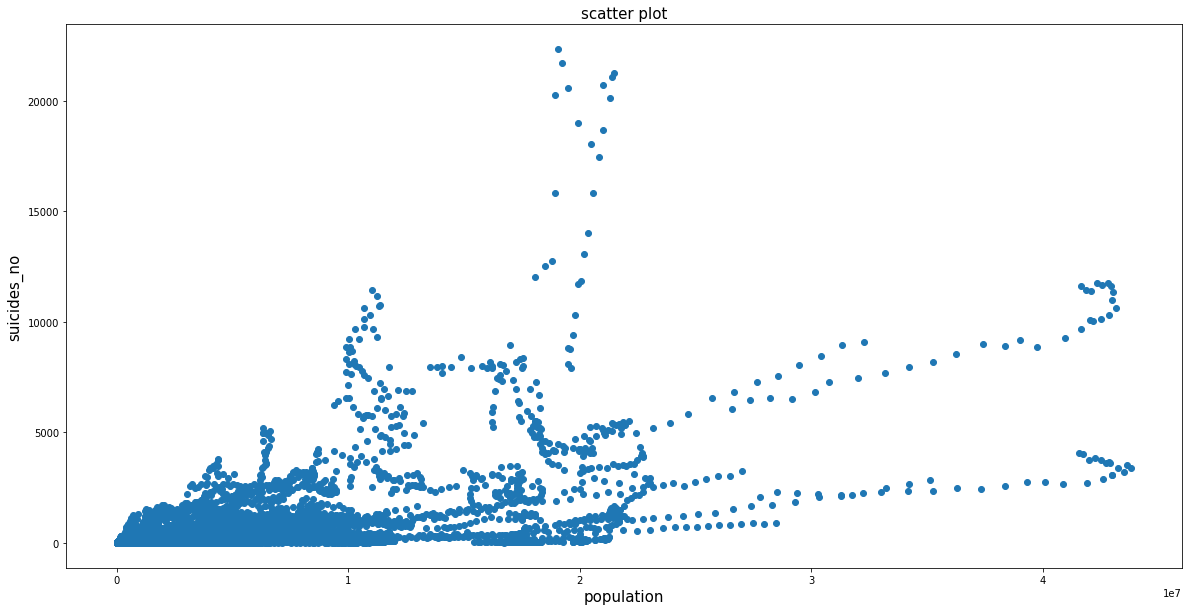

In [20]:
#Plotting a scatter plot between suicides no and population to see the behaviour of no commmiting suicide is it due to more population
plt.figure(figsize=(20,10))
plt.title("scatter plot",fontsize=15)
plt.scatter(df["population"],df["suicides_no"])
plt.xlabel("population",fontsize=15)
plt.ylabel("suicides_no",fontsize=15)
plt.show()

Scatter plot between and population is showing an increasing nature

Q.2 For the data source at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016, 
visualize the following data with the appropriate type of graph, and use the right options to make the 
graph look readable and professional (such as using legends and axes titles with the legible font size, 
and exploring color palettes):


In [21]:
##Repeating few short steps because I earlier remove the HDI for year database from the database based on EDA and here it is required for plotting
df2 = pd.read_csv(url)
df2=df2.drop(columns=["country-year"])
df2[" gdp_for_year ($) "] = df2[" gdp_for_year ($) "].str.replace(',','').astype(float)

Pick the top six countries by average yearly suicides, and display their suicide for each year 
separately.


In [22]:
df2_average_yearly_suicides = df2.groupby(["country", "year"]).sum().reset_index().groupby(["country"]).mean()["suicides_no"].sort_values(ascending=False)
df2_average_yearly_suicides

country
Russian Federation       44805.259259
United States            33355.258065
Japan                    26029.096774
Ukraine                  11426.785714
Germany                  11202.384615
                             ...     
Grenada                      1.461538
San Marino                   1.333333
Antigua and Barbuda          0.407407
Dominica                     0.000000
Saint Kitts and Nevis        0.000000
Name: suicides_no, Length: 101, dtype: float64

In [23]:
top6_average_yearly_suicides = dict(df2_average_yearly_suicides[0:6])
top6_average_yearly_suicides

{'France': 10970.9,
 'Germany': 11202.384615384615,
 'Japan': 26029.09677419355,
 'Russian Federation': 44805.25925925926,
 'Ukraine': 11426.785714285714,
 'United States': 33355.25806451613}

In [24]:
df2_grouping_country_year_suicides = df2.groupby(['country', 'year'])['suicides_no'].sum().reset_index(name="total suicides wrt year")
df2_grouping_country_year_suicides

,country,year,total suicides wrt year
0,Albania,1987,73
1,Albania,1988,63
2,Albania,1989,68
3,Albania,1992,47
4,Albania,1993,73
...,...,...,...
2316,Uzbekistan,2010,1464
2317,Uzbekistan,2011,1640
2318,Uzbekistan,2012,1835
2319,Uzbekistan,2013,1950


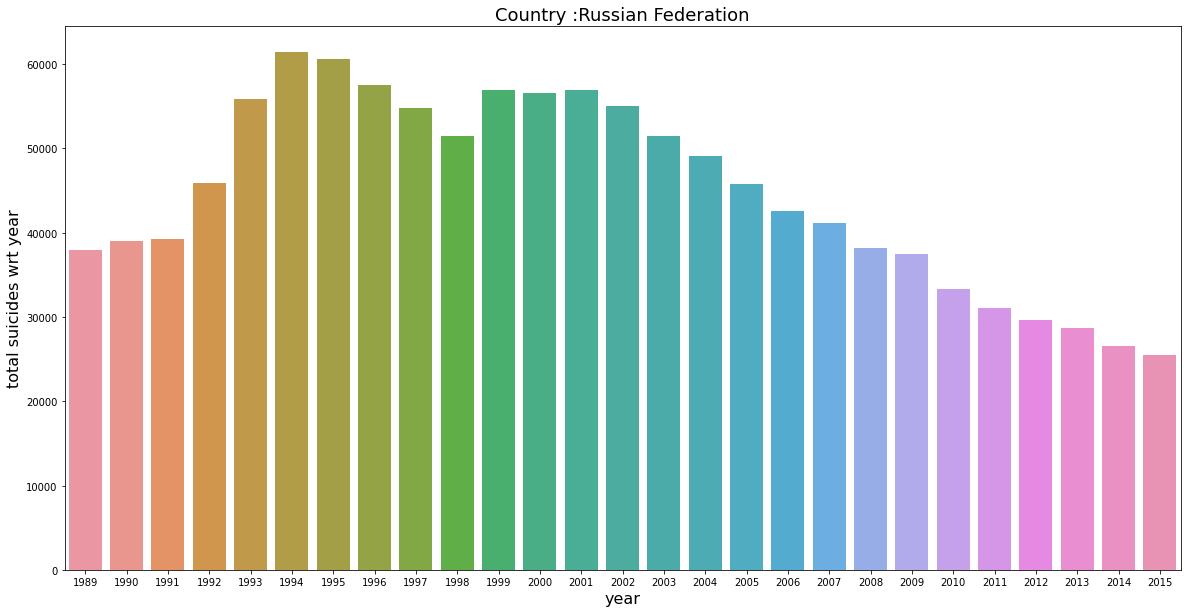

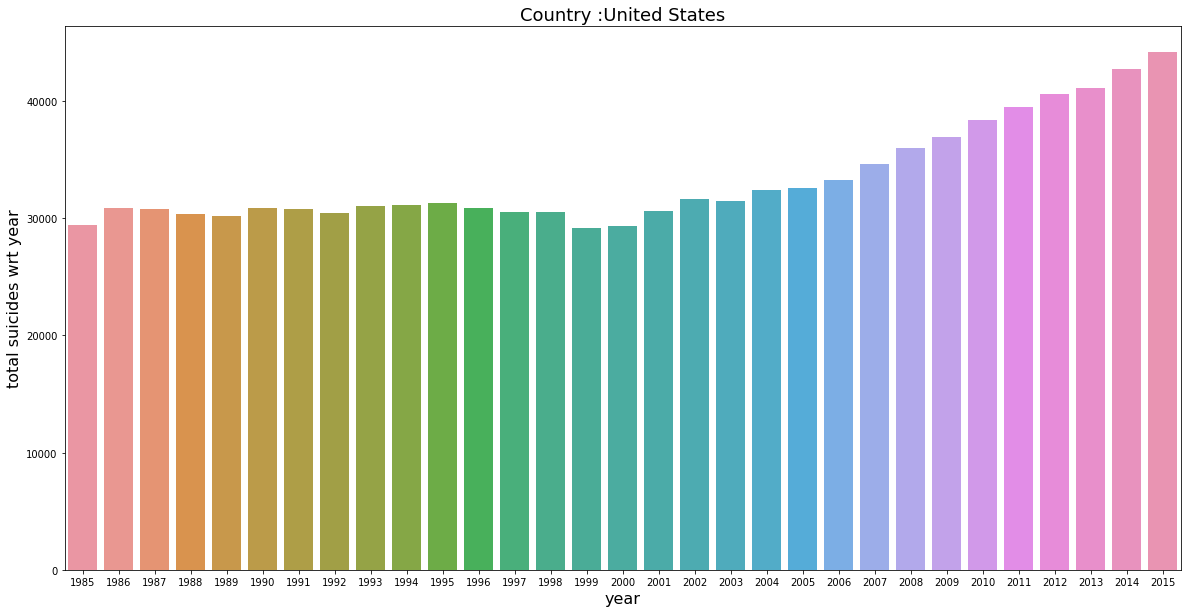

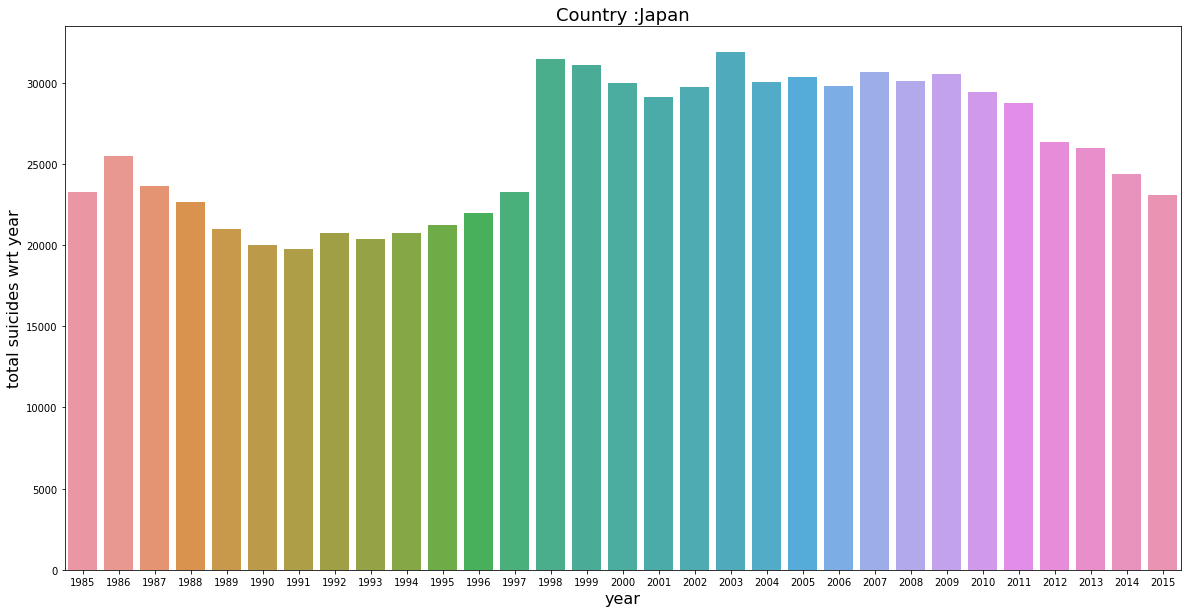

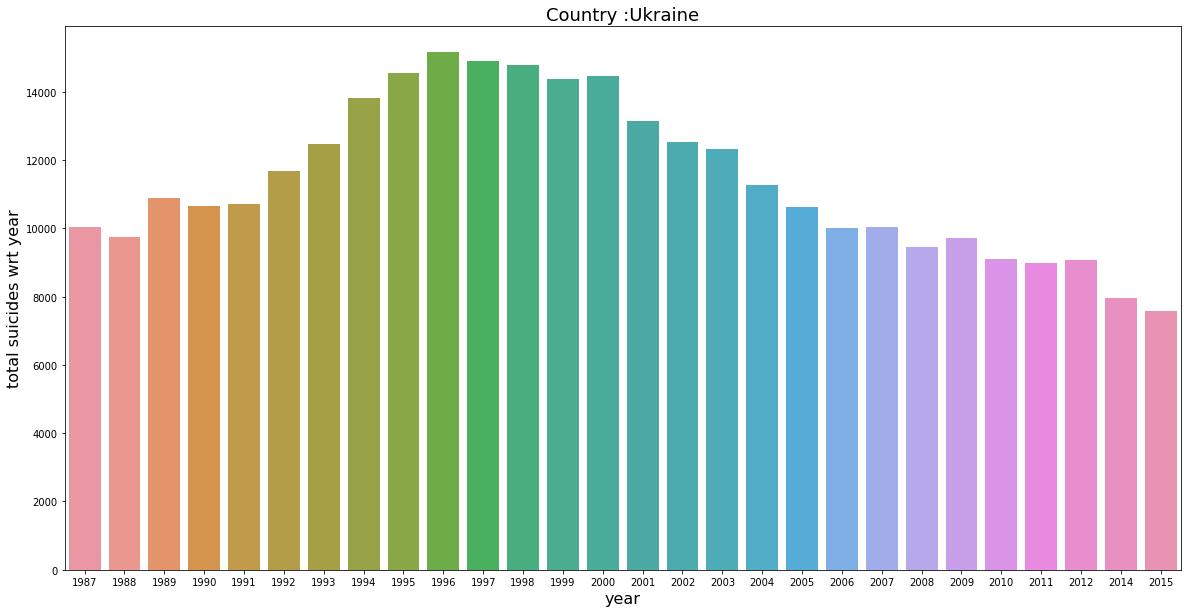

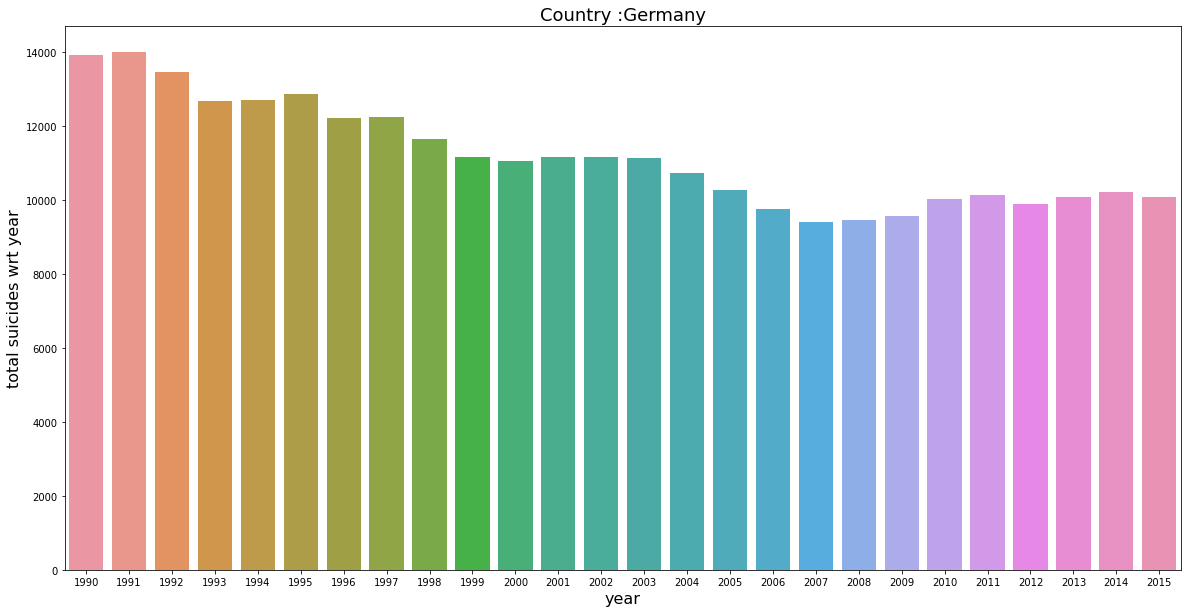

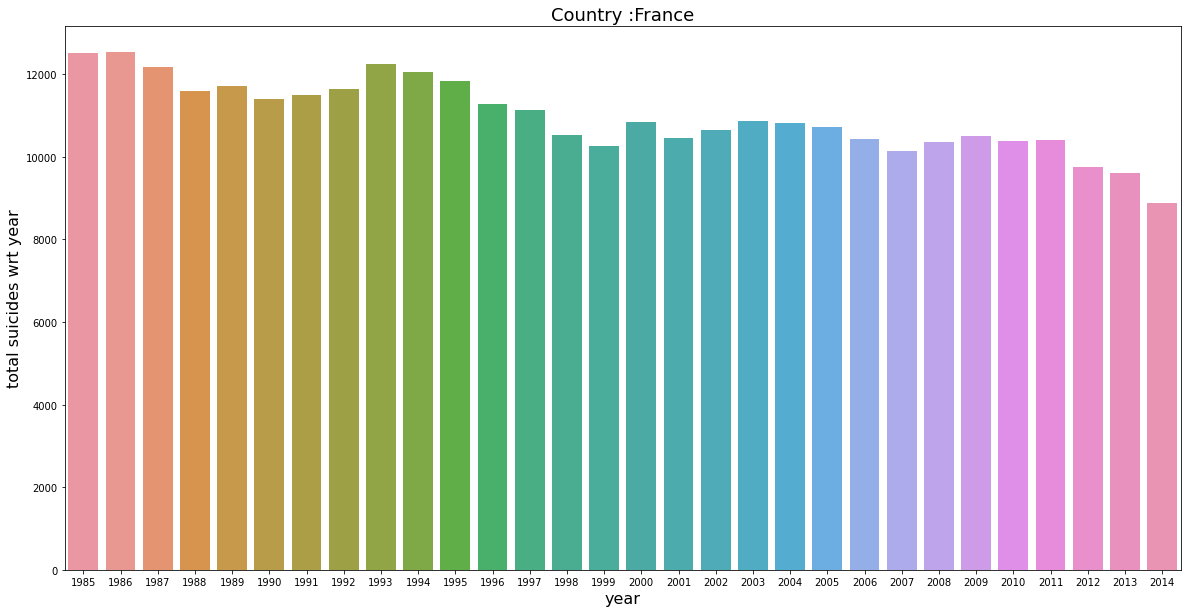

In [25]:
for country in top6_average_yearly_suicides.keys():
  df2_top6_grouping_country_year_suicides = df2_grouping_country_year_suicides.loc[df2_grouping_country_year_suicides["country"]==country]
  plt.figure(figsize=(20,10))
  sns.barplot(x = df2_top6_grouping_country_year_suicides["year"], y = df2_top6_grouping_country_year_suicides["total suicides wrt year"])
  plt.xlabel("year", fontsize=16)
  plt.ylabel("total suicides wrt year", fontsize=16)
  plt.title("Country :" + country,fontsize=18)
  plt.show()
  print()

For the same six countries compare the mix of age groups. What does the plot tell you about the 
differences or similarities by country?

In [26]:
df2_grouping_country_age_suicides = df2.groupby(['country', 'age'])['suicides_no'].sum().reset_index(name="total suicides wrt age")
df2_grouping_country_age_suicides

,country,age,total suicides wrt age
0,Albania,15-24 years,546
1,Albania,25-34 years,427
2,Albania,35-54 years,591
3,Albania,5-14 years,61
4,Albania,55-74 years,264
...,...,...,...
600,Uzbekistan,25-34 years,8578
601,Uzbekistan,35-54 years,10964
602,Uzbekistan,5-14 years,1376
603,Uzbekistan,55-74 years,3595


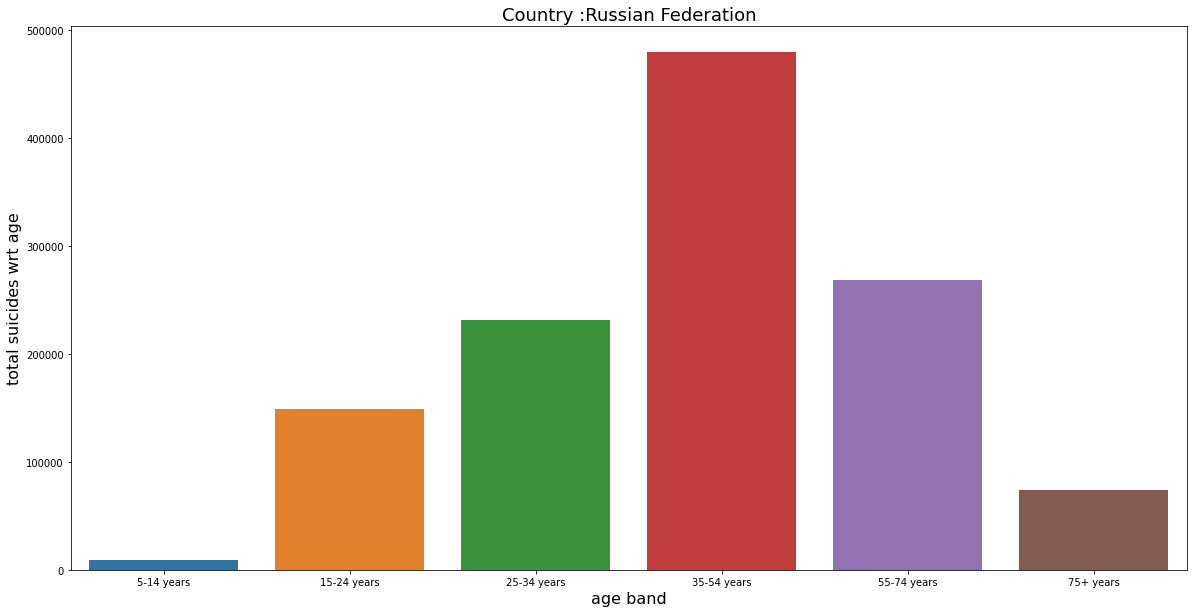

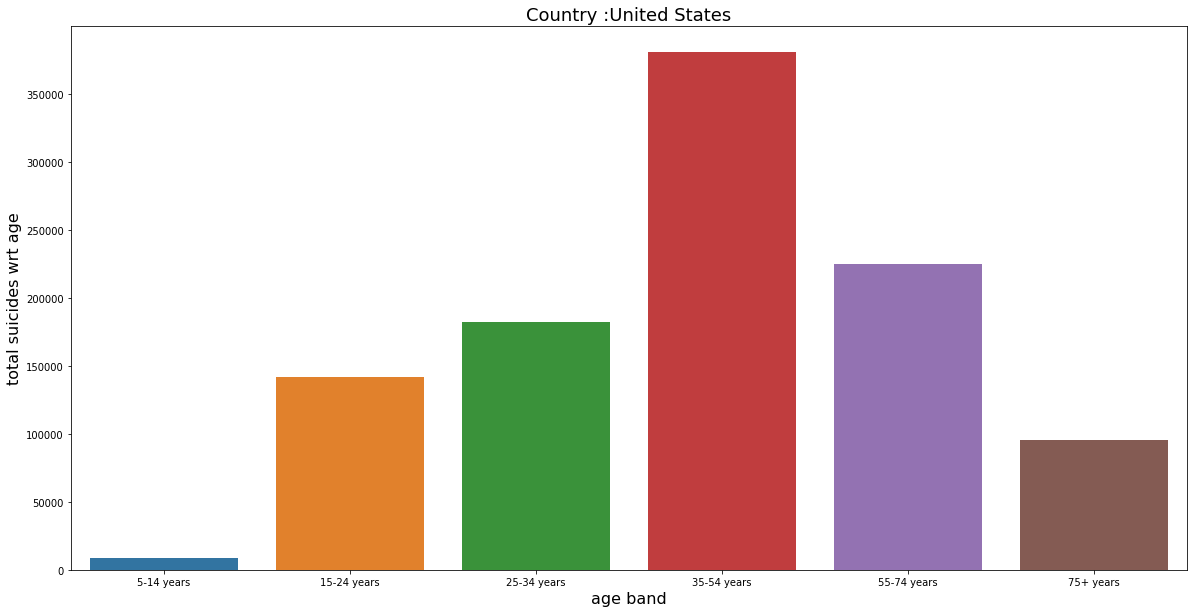

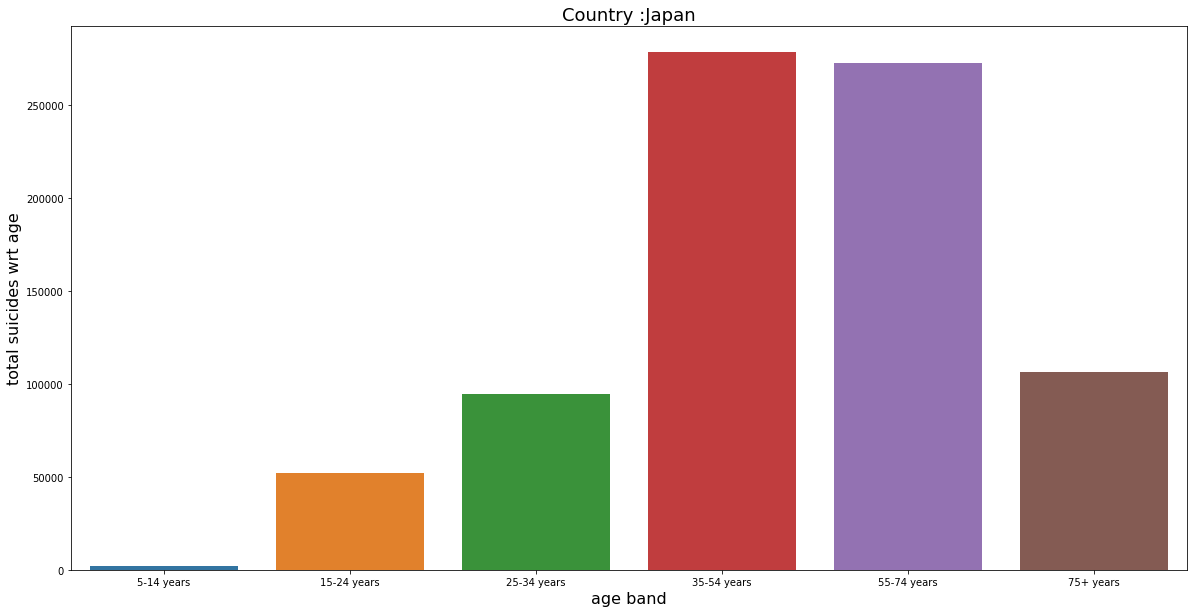

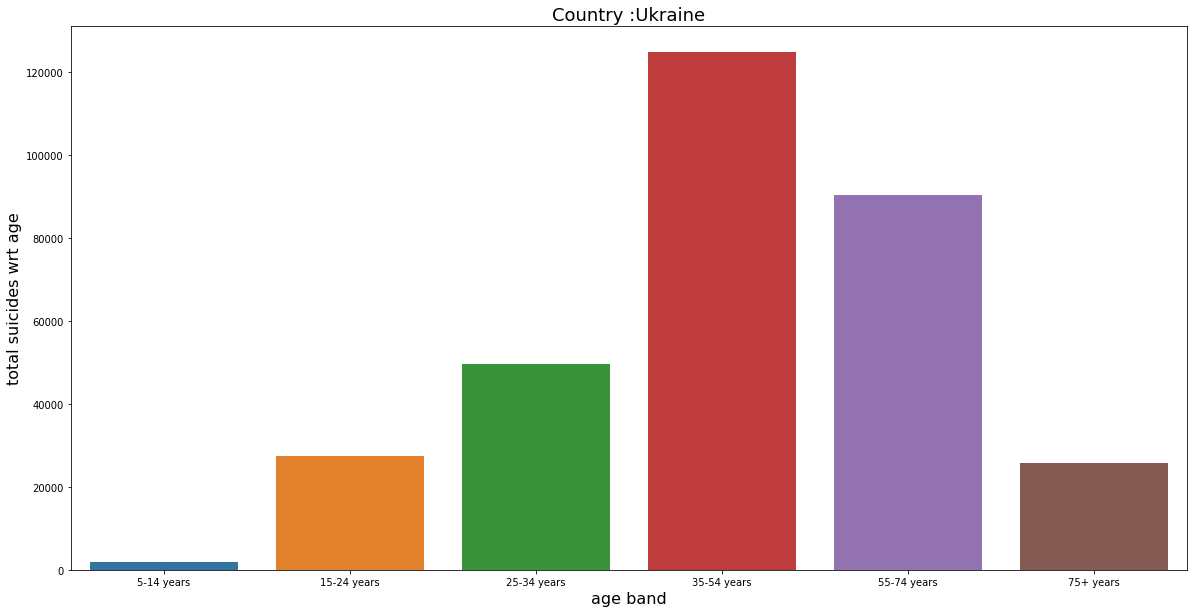

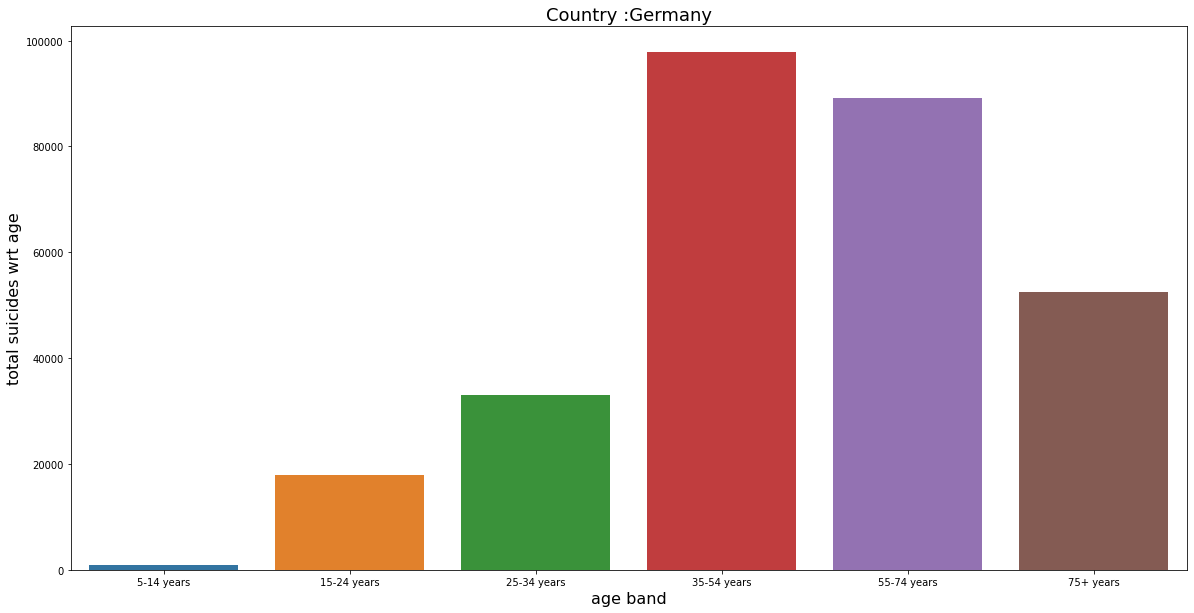

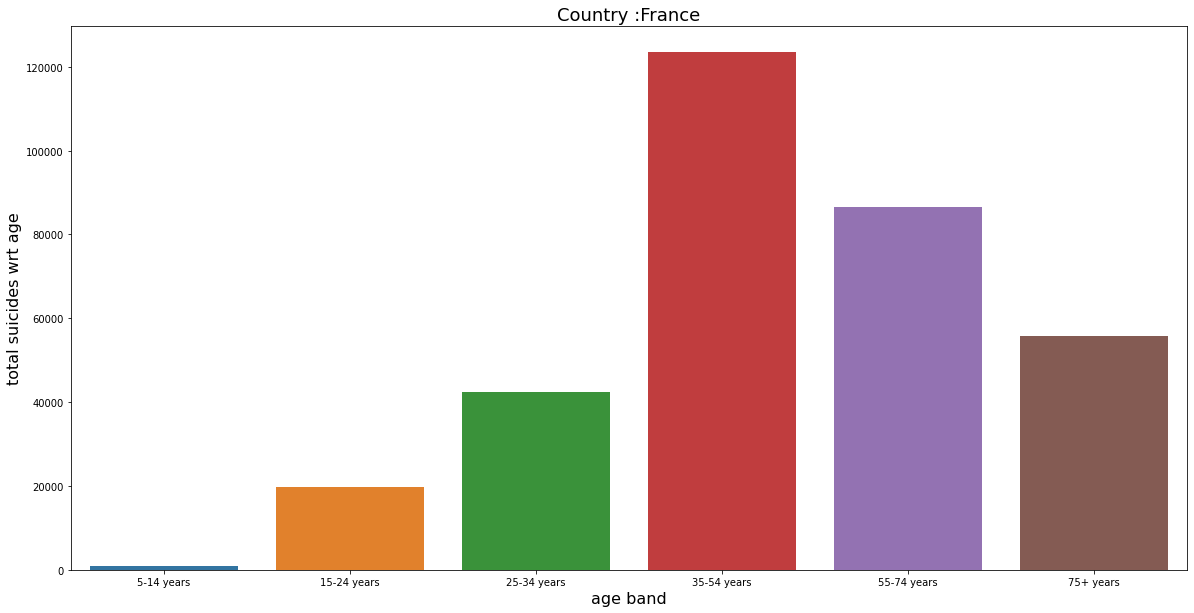

In [27]:
for country in top6_average_yearly_suicides.keys():
  df2_top6_grouping_country_age_suicides = df2_grouping_country_age_suicides.loc[df2_grouping_country_age_suicides["country"]==country]
  plt.figure(figsize=(20,10))
  sns.barplot(x = df2_top6_grouping_country_age_suicides["age"], y = df2_top6_grouping_country_age_suicides["total suicides wrt age"], order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
  plt.xlabel("age band", fontsize=16)
  plt.ylabel("total suicides wrt age", fontsize=16)
  plt.title("Country :" + country, fontsize=18)
  plt.show()
  print()

One thing which we can notice is that for every country most no of deaths are being happening in range of 35-54 years gap and lowest for 5-14 years band. Plots are of increasing and then further they start decreasing in nature 

c. Plot an appropriate set of graphs or charts that highlight the consistency of difference between 
males and females when it comes to suicide rates.

In [28]:
#Grouping them and then segregating into male and female data
df2_grouping_year_sex_suicides = df2.groupby(['year', 'sex'])['suicides_no'].sum().reset_index(name="total suicides")
df2_grouping_year_male_suicides = df2_grouping_year_sex_suicides.loc[df2_grouping_year_sex_suicides["sex"]=="male"]
df2_grouping_year_female_suicides = df2_grouping_year_sex_suicides.loc[df2_grouping_year_sex_suicides["sex"]=="female"]

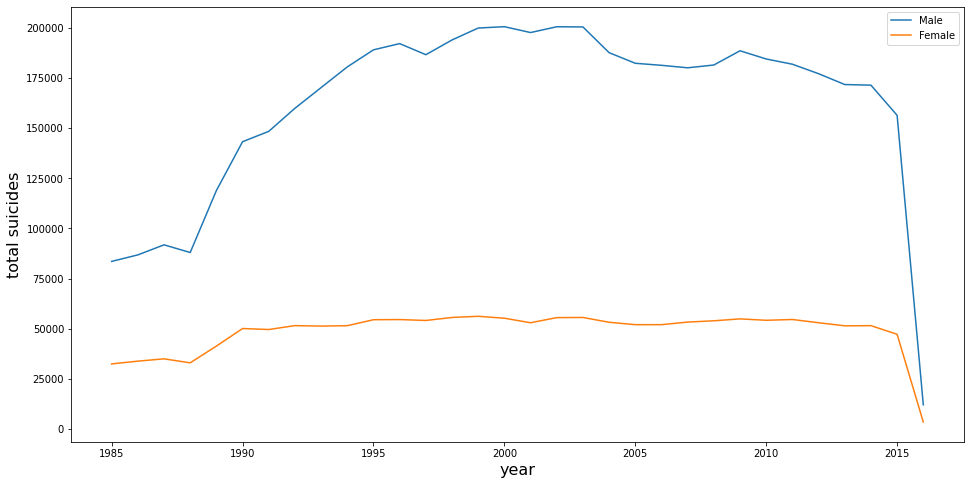

In [29]:
plt.figure(figsize=(16,8))
sns.lineplot(x = df2_grouping_year_male_suicides["year"], y = df2_grouping_year_male_suicides["total suicides"])
sns.lineplot(x = df2_grouping_year_female_suicides["year"], y = df2_grouping_year_female_suicides["total suicides"])
plt.xlabel("year", fontsize=16)
plt.ylabel("total suicides", fontsize=16)
plt.legend(labels=['Male', 'Female'])
plt.show()
print()

d. Using an appropriate graph, show the worst year for each generation in the US.


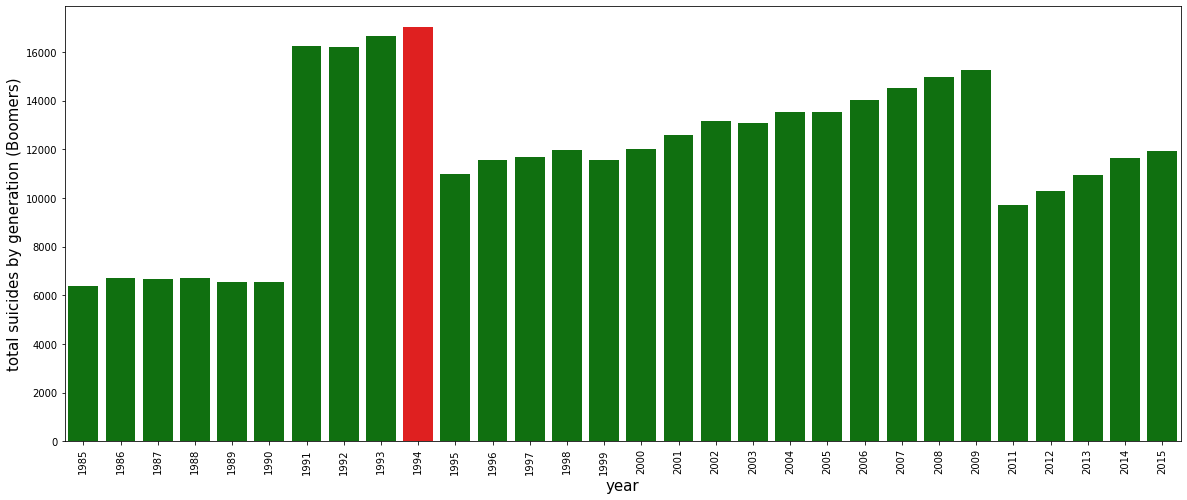

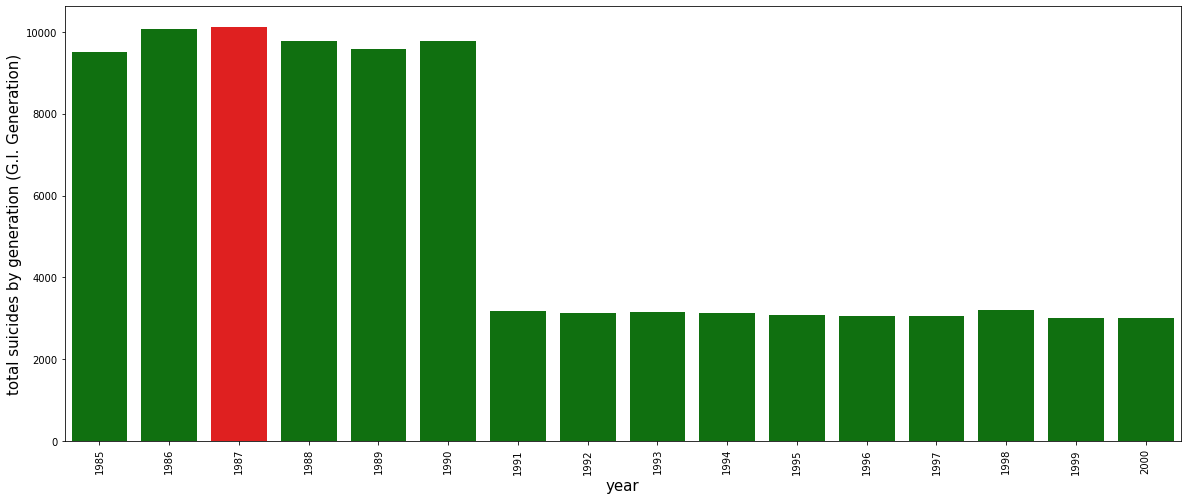

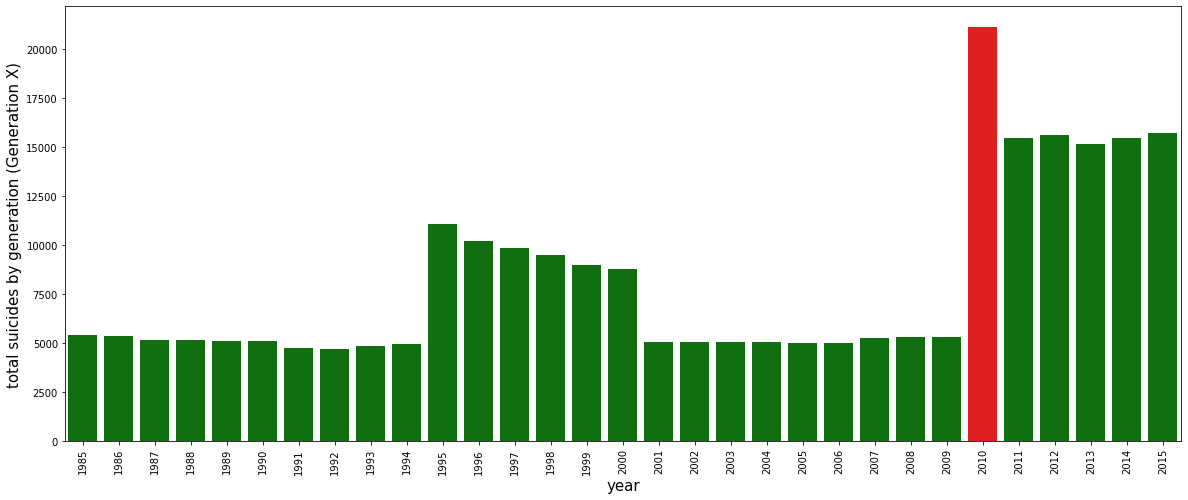

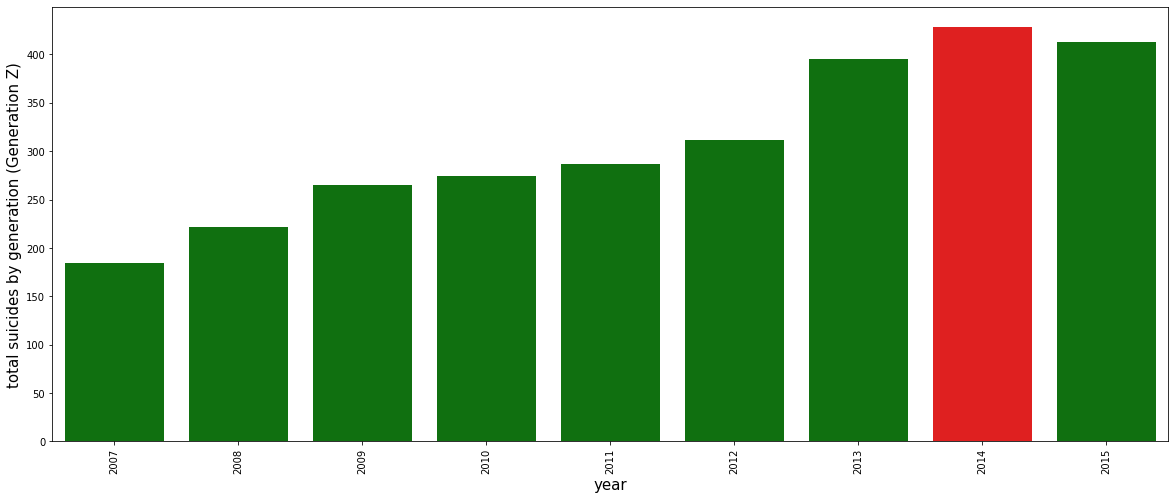

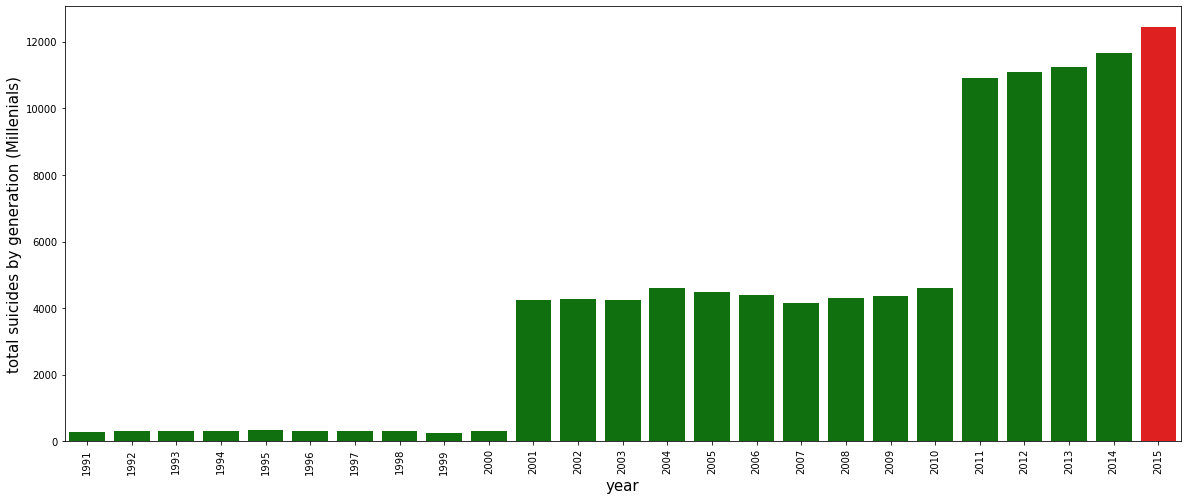

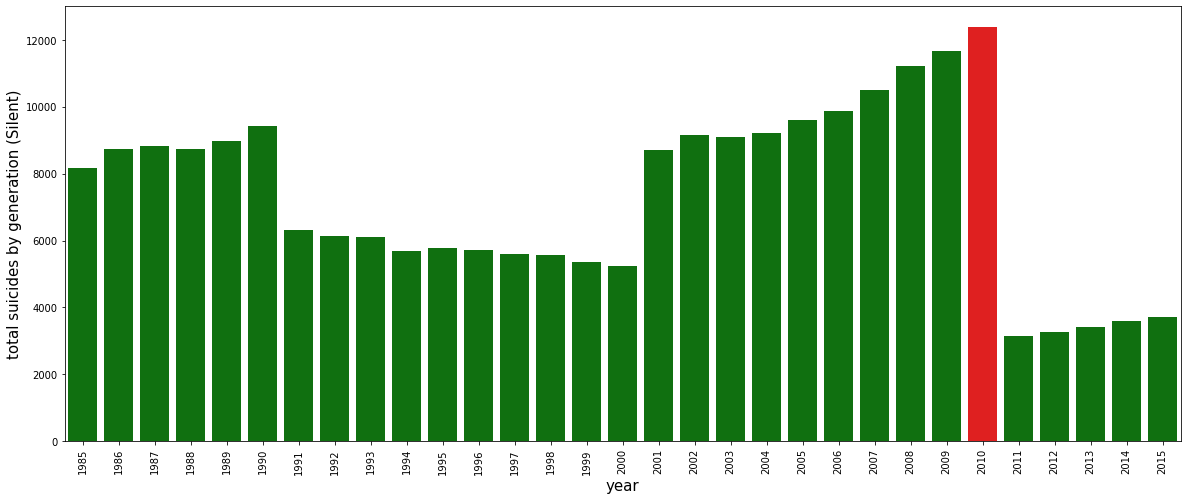

In [30]:
df2_generation_year_suicides = df2[df2["country"]=="United States"].groupby(["generation","year"])['suicides_no'].sum().reset_index(name="total suicides by generation")
for generation in  pd.unique(df2_generation_year_suicides["generation"]):
  df2_generation = df2_generation_year_suicides[df2_generation_year_suicides["generation"]==generation]
  #Making the bar with maximum suicide with different colour
  col = ['green' if y < max(df2_generation["total suicides by generation"]) else 'red' for y in df2_generation["total suicides by generation"]]
  plt.figure(figsize = (20, 8))
  sns.barplot(x = "year" , y = "total suicides by generation", data=df2_generation, palette = col)
  plt.xticks(rotation=90)
  plt.ylabel("total suicides by generation (" + generation+")",fontsize=15)
  plt.xlabel("year",fontsize=15)
  plt.show()
  print()

e. Plot a bihistogram for a few specific countries (for a year, say 2000) for male and female 
populations by age ranges to highlight some differences in sex ratios between countries. Check 
out: https://www.itl.nist.gov/div898/handbook/eda/section3/bihistog.htm and 
https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn for 
ideas

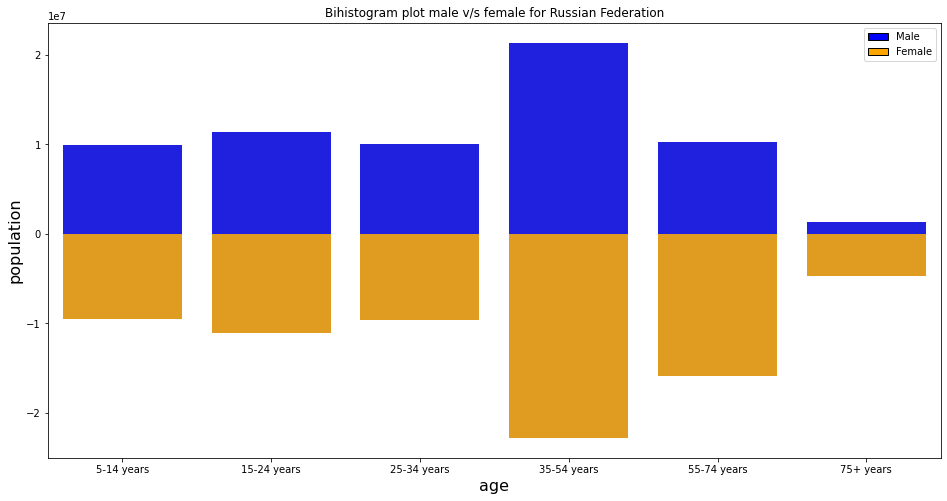

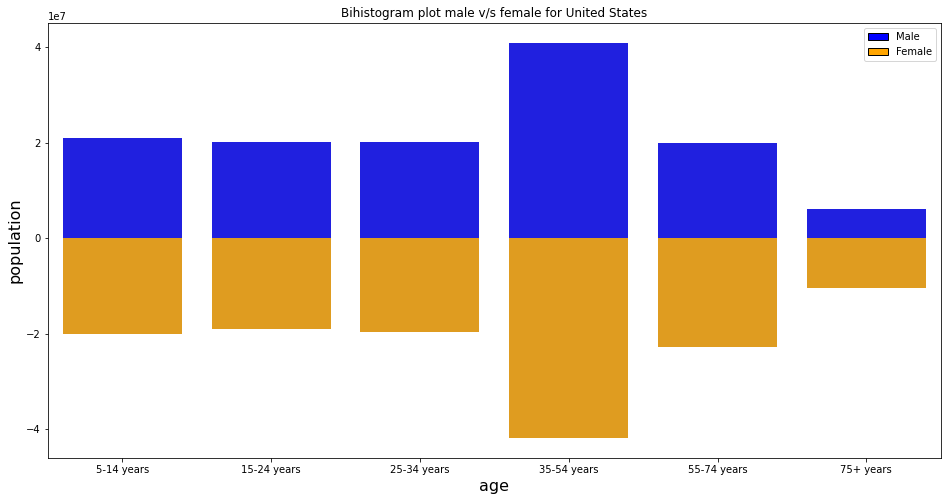

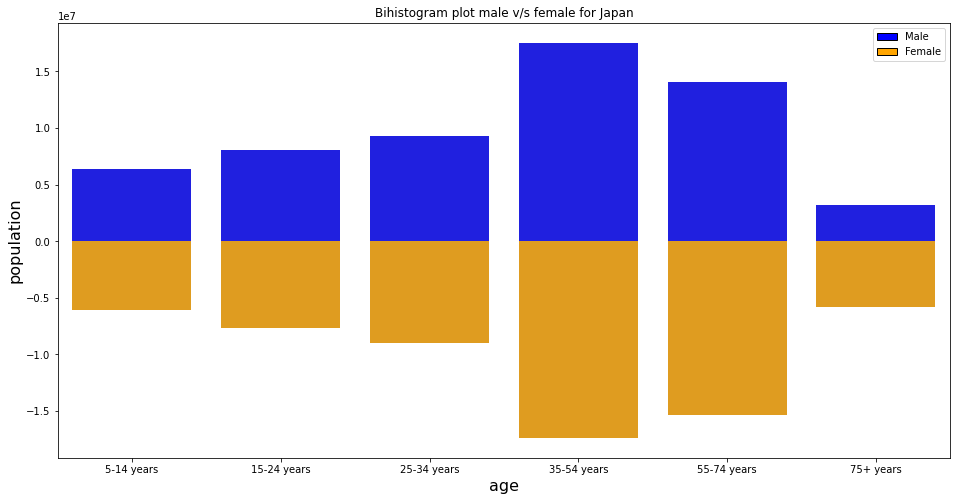

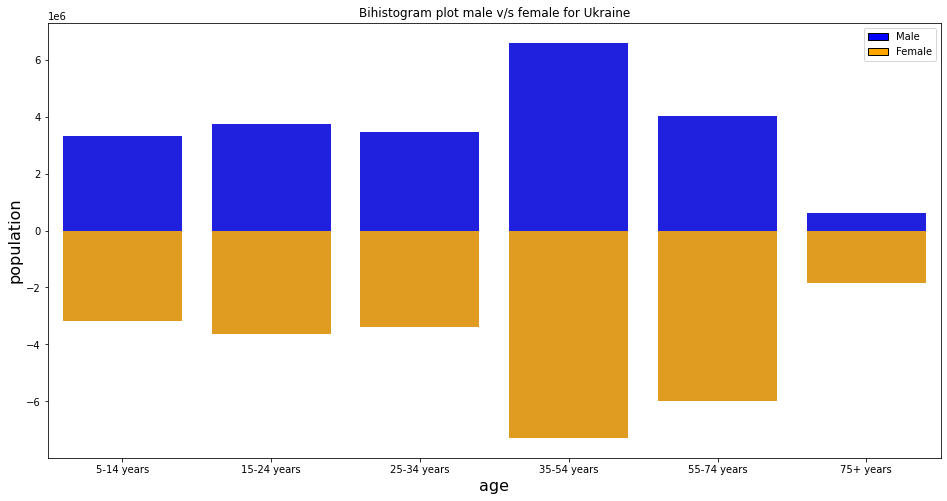

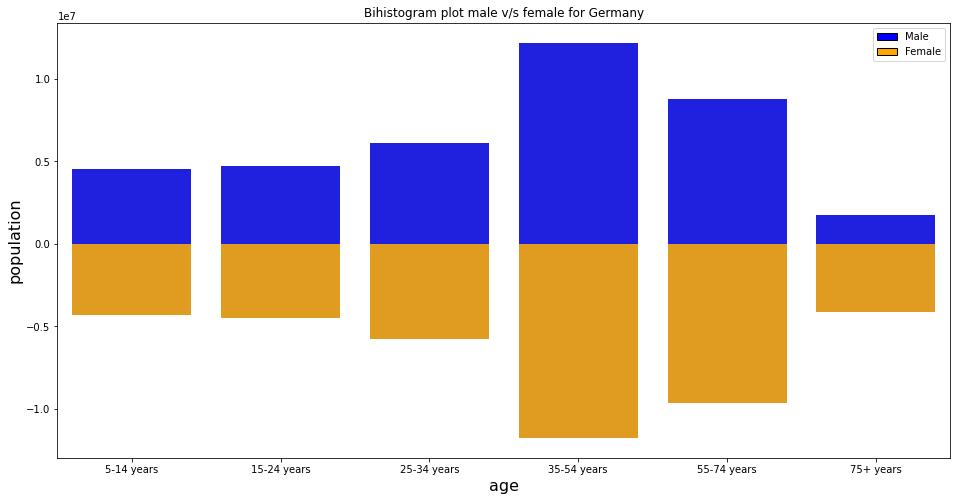

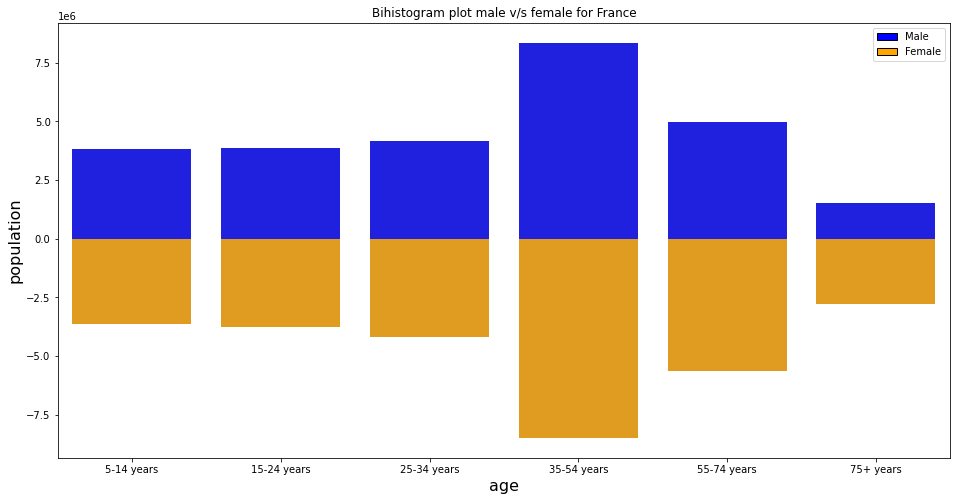

In [31]:
#I have taken the same top6 countries and year2000 for plotting
for country in top6_average_yearly_suicides.keys():
  df2_grouping_2000_male_population = df2.loc[(df2["year"]==2000) & (df2["sex"]=="male") & (df2["country"]==country)] 
  df2_grouping_2000_female_population = df2.loc[(df2["year"]==2000) & (df2["sex"]=="female") & (df2["country"]==country)]
  plt.figure(figsize = (16, 8))
  sns.barplot(x = "age" , y = "population", data=df2_grouping_2000_male_population,color="blue",order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
  sns.barplot(x = df2_grouping_2000_female_population["age"] , y = -df2_grouping_2000_female_population["population"],color="orange",order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
  plt.ylabel("population", fontsize=16)
  plt.xlabel("age", fontsize=16)
  plt.title("Bihistogram plot male v/s female for "+ country)
  plt.legend(handles=[Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["blue","orange"]],labels=["Male","Female"])
  plt.show()
  print()



f. Show a bubble plot to show the relation between suicide rates, human development index (HDI), 
and population. Due to the large spread in population, you might have to use a transform. Is 
there any interesting observation

In [32]:
df2_suicides_hdi_population = df2.dropna(axis = 0)
df2_suicides_hdi_population = df2_suicides_hdi_population.groupby(["country", "year", "HDI for year"])["suicides/100k pop", "population"].sum().reset_index()
df2_avg_suicides_hdi_population = df2_suicides_hdi_population.groupby(["country"])["HDI for year","suicides/100k pop","population"].mean().reset_index()
df2_avg_suicides_hdi_population

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,HDI for year,suicides/100k pop,population
0,Albania,0.673000,28.227500,2.804761e+06
1,Antigua and Barbuda,0.781667,0.000000,8.977300e+04
2,Argentina,0.779600,120.061000,3.488351e+07
3,Armenia,0.690125,38.957500,2.975998e+06
4,Australia,0.912750,147.330000,1.961798e+07
...,...,...,...,...
85,United Arab Emirates,0.825000,19.380000,6.060084e+06
86,United Kingdom,0.863500,88.264000,5.719106e+07
87,United States,0.891600,166.326000,2.696245e+08
88,Uruguay,0.746556,236.923333,3.028569e+06


To transform population log is taken so that we can plot them easily for suitable range

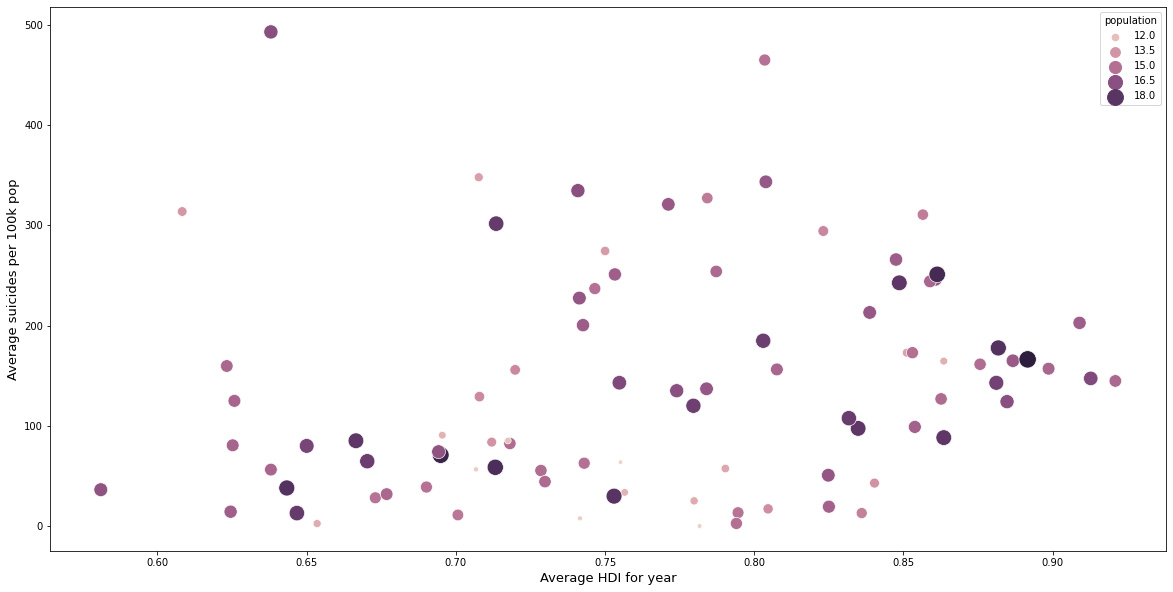

In [33]:
plt.figure(figsize = (20, 10))
sns.scatterplot(y=df2_avg_suicides_hdi_population["suicides/100k pop"],x=df2_avg_suicides_hdi_population["HDI for year"],hue=np.log(df2_avg_suicides_hdi_population["population"]),size=np.log(df2_avg_suicides_hdi_population["population"]),sizes=(20,300))
plt.ylabel("Average suicides per 100k pop", fontsize=13)
plt.xlabel("Average HDI for year", fontsize=13)
plt.show()

one is that higher HDI country have higher suicides even though they have facilities